# Интернет-магазин «Стримчик»


Анализ рынка компьютерных игр.

Перед нами данные о продажах игр до 2016 года, собранные из открытых источников. В данных присутствуют исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.
Описание данных:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

<b>Цель:</b>

Провести анализ данных и выявить закономерности, определяющие успешность игры, которые позволят сделать ставку на потенциально популярный продукт и спланировать рекламную кампанию на 2017 год.

Выполнил: Николай Кисель

<b>Примерный план работы:</b>

1. Просмотр данных

2. Подготовка и предобработка данных.

3. Исследовательский анализ данных:
- Анализ выпуска игр по годам;
- Анализ продажи по платформам;
- Выбор актуального периода для построения прогноза на 2017 год;
- Выбор актуальных платформ;
- Анализ продаж для актуальных платформ;
- Анализ корреляции между продажами игр и оценками пользователей/критиков;
- Анализ жанров.

4. Портрет пользователя каждого региона

5. Проверка гипотез:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action и Sports разные.

<b>Краткий вывод:</b>

При проведении маркетинговых кампаний следует принять во внимание следующее:

1. Самыми перспективными платформами для проведения рекламной кампании на 2017 год выглядят PlayStation 4 и XBox One. Это самые актуальные платформы с увеличивающимся количеством выпускаемых проектов и растующими продажами.
2. Для PlayStation 4 лучший регион для продвижения - Европа, для XBox One - Северная Америка.
3. Игры на которые необходимо делать упор: Call of Duty: Black Ops 3 и Grand Theft Auto V. Данные проекты располагаются на первых строчках рейтинга продаж для данных платформ, также они относятся к самым популярным жанрам (Action и Shooter) в регионах продвижения платформ (Европа и Северная Америка). Кроме того, данные игровые проекты доступны на других популярных платформах, что также положительно скажется на продажах.
4. Указанные игры имеют рейтинг 'M' ESRB. На основании проведенного анализа этот рейтинг самый популярный в регионах продвижения платформ.

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

## Загрузка и описание данных

In [2]:
# импортируем датасет

df = pd.read_csv('games.csv')

### Просмотр данных

In [3]:
# представление информации в датасете

df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
# типы данных и наличие пропусков в колонках 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В датасете присутствуют пропуски. Оценим их количество

In [5]:
# количество пропусков

df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

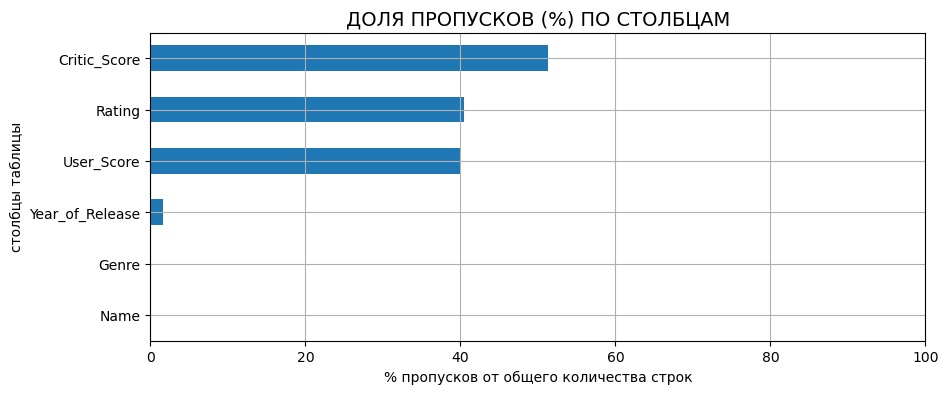

In [6]:
# доля пропусков в столбцах


(
    (
        df
        .isna()
        .mean() * 100
    )
    .to_frame()
    .rename(columns = {0:'space'})
    .query('space > 0')
    .sort_values(by = 'space', ascending = True)
    .plot(kind = 'barh', figsize = (10,4), legend = False, grid=True, xlim = (0, 100))
)


plt.title('ДОЛЯ ПРОПУСКОВ (%) ПО СТОЛБЦАМ', fontsize = 14, color = 'black')
plt.xlabel('% пропусков от общего количества строк', fontsize = 10, color = 'black')
plt.ylabel('столбцы таблицы', fontsize = 10, color = 'black')
plt.show()

### Промежуточный вывод

1. Названия всех столбцов необходимо привести к нижнему регистру.
2. В столбцах Critic_Score, Rating и User_Score большое количество пропусков. Также присутствуют пропуски в столбцах Year_of_Release, Genre и Name.
3. В столбцах Year_of_Release и User_Score некорректный тип данных.

## Предобработка данных

### Названия столбцов

Для упрощения дальнейшей работы в первую очередь обработаем названия столбцов

In [7]:
# при помощи метода строк lower() приведем названия столбцов к нижнему регистру

df.columns = df.columns.str.lower()

In [8]:
# контроль обработки

df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Поиск явных дубликатов

In [9]:
# поиск явных дубликатов в таблицах при помощи методов duplicated() и sum()

df.duplicated().sum()

0

Явных дубликатов в датесете нету. Проверим датасет на наличие неявных дублей

### Поиск неявных дубликатов

Выполним поиск дубликатов по совокупности главных параметров (по столбцам name, platform и year_of_release)

In [10]:
df.duplicated(['name', 'platform', 'year_of_release']).sum()

2

В датасете 2 неявных дубликата. Посмотрим на эти строки

In [11]:
df[df.duplicated(['name', 'platform', 'year_of_release'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


Строки 659 и 14244 кроме неявных дубликатов также являются строками с пропусками в столбцах name и genre. Всего в датасете по два пропуска в name и genre - это строки 659 и 14244. Принимая это во внимание, а также принимая во внимание значения в столбцах с продажами удалим из датафрейма строки 659, 14244, 16230

In [12]:
# удалим строки 659 14244 и 16230 и обновим индексы таблицы

df = df.drop([659, 14244, 16230]).reset_index(drop=True)

In [13]:
# контроль обработки

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16712 entries, 0 to 16711
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       10013 non-null  object 
 10  rating           9948 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Обработка пропусков

Пропуски в столбца name и genre были обработаны в предыдущем пункте. Просмотрим на значения в столбце rating

In [14]:
df.rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Согласно информации из открытых источников, рейтинг ESRB - это рейтинг для США и Канады. А значит пропуски скорее связаны с регионом для которого производился проект, и не связаны с ошибкой заполнения данных. Пропуски в этом столбце также можно заполнить значениями unknown

In [15]:
df['rating'] = df['rating'].fillna('Unknown')

Просмотрим строки с пропусками в столбце year_of_release

In [16]:
df[df['year_of_release'].isna()].head(50)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,Unknown
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,Unknown
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
677,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
718,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
804,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


Пропуски в столбце year_of_release характерны для старых платформ и их количество незначительное. Согласно заданию к работе необходимо проанализировать данные по продажам за актуальный период что бы сделать прогнозы на 2017 год, следовательно наличие данных по году выпуска проекта важно для дальнейшего анализа. Принимая все это во внимание, а также тот факт, что в дальнейшем количество данных будет сокращено до актуального периода, удалим строки с пропусками в столбце year_of_release.

In [17]:
df = df.dropna(subset=['year_of_release'])

Просмотрим значения в столбце critic_score и user_score

In [19]:
df.critic_score.unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [20]:
df.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Пропуски в отзывах могли появиться, потому что продажи игры были низкие и не набралось необходимого количества индивидуальных отзывов для получения итоговой оценки. Для проверки предположения построим график продаж по годам игр с оценкой пользователей

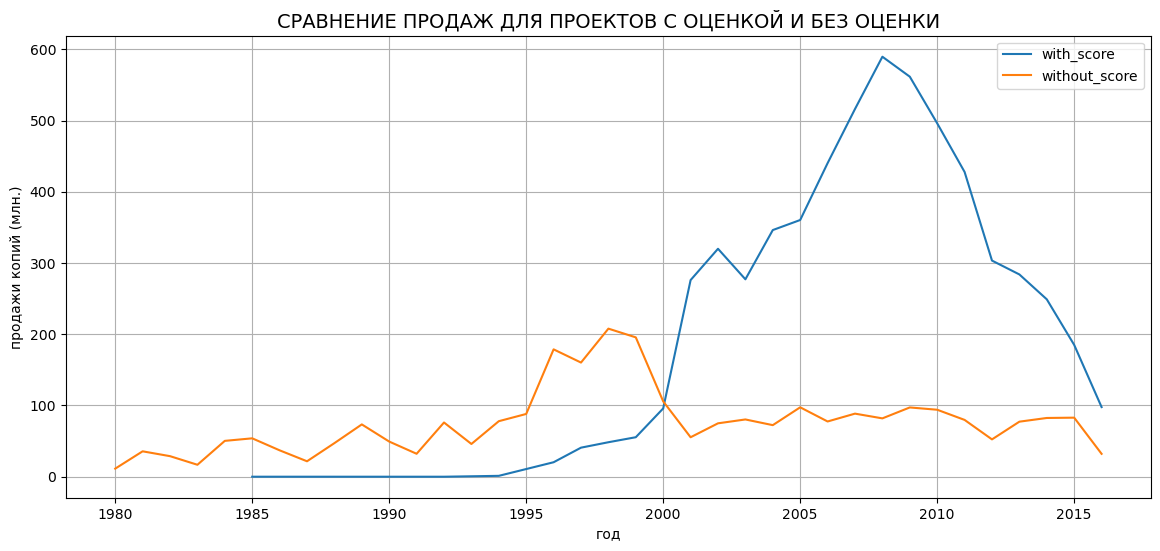

In [21]:
# скопируем датасет и создадим столбец с суммарными продажами
# разделим датасет на две сводные таблицы с общими продажами в разрезе года выпуска проекта
# отделно для игр с оценкой и без оценки
# далее построим график продаж игр с оценкой и без оценки

temp = df.copy()
temp['total_sales'] = temp.loc[:, ['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
temp_1 = temp[temp['user_score'].notnull()].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
temp_2 = temp[temp['user_score'].isnull()].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')

fig, ax = plt.subplots(figsize=(14, 6))
temp_1.plot(grid=True, ax=ax)
temp_2.plot(grid=True, ax=ax)
ax.legend(['with_score', 'without_score'])
plt.title('СРАВНЕНИЕ ПРОДАЖ ДЛЯ ПРОЕКТОВ С ОЦЕНКОЙ И БЕЗ ОЦЕНКИ', fontsize = 14, color = 'black')
plt.xlabel('год', fontsize = 10, color = 'black')
plt.ylabel('продажи копий (млн.)', fontsize = 10, color = 'black')
plt.show()

По графику видна разница в продажах для проектов с оценкой и без оценки: для проектов без оценки характерны более низкие продажи. Следовательно можно сделать вывод, что проекты с невысокими продажами не набирали достаточного количества оценок, а эти оценки не случайный набор данных, а агрегированные данные. Поэтому пропуски в столбцах нельзя заменять средним или медианой. Необходимо обратить внимание на значение tbd в столбце user_score. Посмотрим на эти строки.

In [22]:
# количество строк со значением tbd

df[df['user_score'] == 'tbd'].name.count()

2376

In [23]:
# строки со значением tbd

df[df['user_score'] == 'tbd'].head(30)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.00,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.00,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.00,0.20,71.0,tbd,E
717,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.00,0.18,NaN,tbd,E
725,Dance Dance Revolution X2,PS2,2009.0,Simulation,1.09,0.85,0.00,0.28,NaN,tbd,E10+
820,The Incredibles,GBA,2004.0,Action,1.15,0.77,0.04,0.10,55.0,tbd,E
880,Who wants to be a millionaire,PC,1999.0,Misc,1.94,0.00,0.00,0.00,NaN,tbd,E
1046,Tetris Worlds,GBA,2001.0,Puzzle,1.25,0.39,0.00,0.06,65.0,tbd,E
1047,Imagine: Teacher,DS,2008.0,Simulation,0.70,0.82,0.00,0.19,NaN,tbd,E


Ничего подозрительного. Согласно информации из открытых источников рейтинг tbd обозначает то, что рейтинг игре не был присвоен. Заменим значения tbd на аналогичное nan

In [24]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan

In [25]:
# контроль обработки

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16443 entries, 0 to 16711
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   object 
 10  rating           16443 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


### Замена типов данных

В столбце year_of_release тип данных заменим на int64

In [26]:
df['year_of_release'] = df['year_of_release'].astype('int')

В столбце user_score тип данных заменим на float64

In [27]:
df['user_score'] = df['user_score'].astype('float')

In [28]:
# контроль обработки

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16443 entries, 0 to 16711
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int32  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


### Столбец с суммарными продажами

Для дальнейшего проведения анализа добавим в датасет столбец с суммарными продажами для каждого проекта

In [29]:
df['total_sales'] = df.loc[:, ['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [30]:
# контроль обработки

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16443 entries, 0 to 16711
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int32  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB


### Промежуточный вывод

По итогу предобработки данных было выполнено:

1. Названия столбцов приведены к нижнему регистру.

2. Строки с пропусками в столбцах name и genre были удалены ввиду их незначительного количества.

3. Пропуски в столбце year_of_release характерны для старых платформ и их количество незначительное. Согласно заданию к работе необходимо проанализировать данные по продажам за актуальный период что бы сделать прогнозы на 2017 год, следовательно наличие данных по году выпуска проекта важно для дальнейшего анализа. Принимая все это во внимание, а также тот факт, что в дальнейшем количество данных будет сокращено до актуального периода, строки с пропусками в столбце year_of_release также были удалены.

4. Пропуски в столбце rating заменены значениями unknown.

5. Значения tbd столбца user_score заменены на NaN.

6. Пропуски в столбцах critic_score и user_score вызваны недостаточным количеством продаж и оценок. Пропуски в данных столбцах нельзя заменять каким-либо агрегированным значением.

7. В столбцах year_of_release и user_score был изменен тип данных.

8. Найдено и удалено 2 дубликата.

9. В таблицу добавлен столбец с сумарными продажами по 4 рынкам.

## Анализ игрового рынка

### Продажи и количество выпущенных проектов в разрезе лет

In [31]:
# для исключения многократного включения в расчет одинаковых проектов, выпущенных для разных платформ, сведем данные по названию проекта
# просуммируем продажи и сюда же добавим информацию о годе выпуска

temp = df.copy()
temp = temp.groupby('name', as_index=False).agg({'total_sales' : 'sum', 'year_of_release' : 'first'})
temp

,name,total_sales,year_of_release
0,Beyblade Burst,0.03,2016
1,Fire Emblem Fates,1.67,2015
2,Frozen: Olaf's Quest,1.10,2013
3,Haikyu!! Cross Team Match!,0.04,2016
4,Tales of Xillia 2,0.84,2012
...,...,...,...
11421,thinkSMART FAMILY!,0.03,2010
11422,thinkSMART: Chess for Kids,0.01,2011
11423,uDraw Studio,2.42,2010
11424,uDraw Studio: Instant Artist,0.19,2011


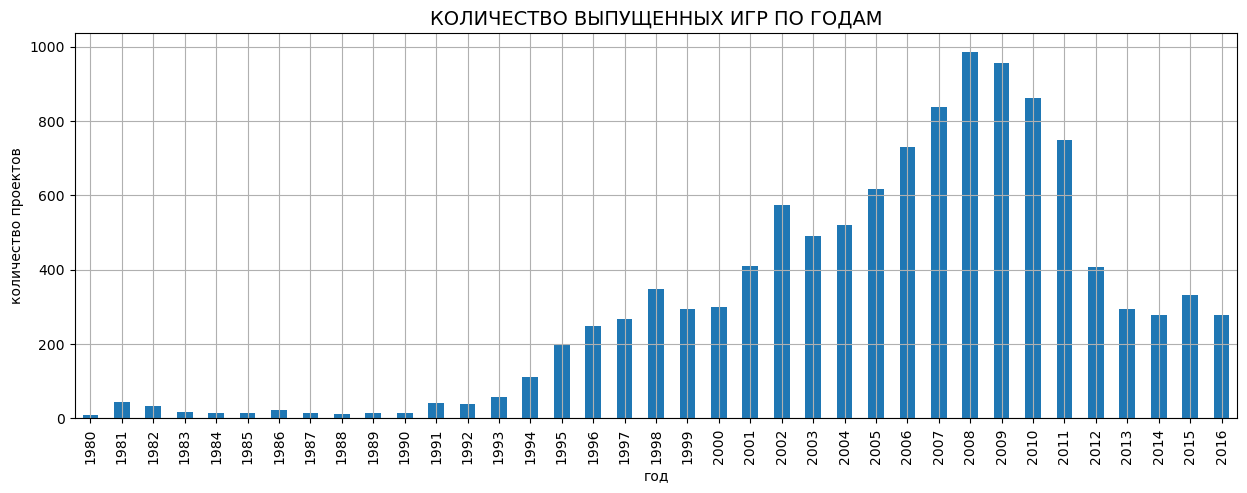

In [33]:
# построим график выпуска проектов по годам

(
    temp
    .groupby('year_of_release')
    .name
    .count()    
    .plot(
        kind='bar',
        figsize=(15,5),
        grid=True,
        legend=False
    )
)

plt.title('КОЛИЧЕСТВО ВЫПУЩЕННЫХ ИГР ПО ГОДАМ', fontsize = 14, color = 'black')
plt.xlabel('год', fontsize = 10, color = 'black')
plt.ylabel('количество проектов', fontsize = 10, color = 'black')
plt.show()

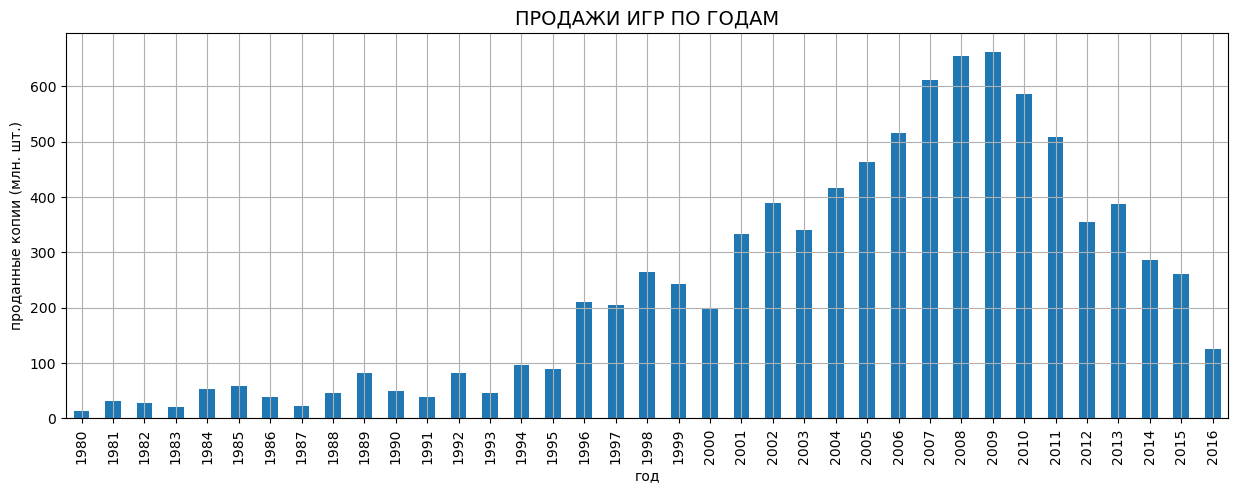

In [32]:
# построим график продаж игр по годам

(
    temp
    .groupby('year_of_release')
    .total_sales
    .sum()    
    .plot(
        kind='bar',
        figsize=(15,5),
        grid=True,
        legend=False
    )
)

plt.title('ПРОДАЖИ ИГР ПО ГОДАМ', fontsize = 14, color = 'black')
plt.xlabel('год', fontsize = 10, color = 'black')
plt.ylabel('проданные копии (млн. шт.)', fontsize = 10, color = 'black')
plt.show()

#### Промежуточный вывод:

По данным рафикам можно отметить 4 стадии развития рынка видеоигр:

1. До 1994 года  выходило меньше 100 новых проектов в год.
2. С 1994 года начинается бурный рост числа выпускаемых игр примерно со 100 проектов до пика более 1000 проектов в год в 2008 году. Рост примерно в 10 раз за 14 лет.
3. С 2009 года можно наблюдать постепенное снижение выпуска новых проектов до примерно 500 штук в год к 2012 году.
4. С 2013 количество новых видеоигр остается практически одинаковым в районе 300 проектов в год.

Можно предположить, что бурный рост выпускаемых игр скорее всего связано с выходом новой, революционной по меркам того времени, консоли PlayStation первого поколения. Наблюдаемое снижение в период с 2009 скорее всего связано с началом экспансии современных смартфонов с выпуска в 2007 году первого Iphone, а также с активным развитием сервисов цифровой дистрибуции игр типа Steam с 2010-х годов.

По графику продаж можно подтвердить выводы, сделанные по графику количества выпускаемых игр:

1. Продажи медленно росли до 1995 года.
2. С 1995 года продажи росли большими темпами до пика в 2008 году.
3. С 2008 года можно отметить нисходящий тренд в продажах.

### Анализ продаж

#### Продажи по платформам

Для начала посмотрим на количество выпущенных игр по платформам

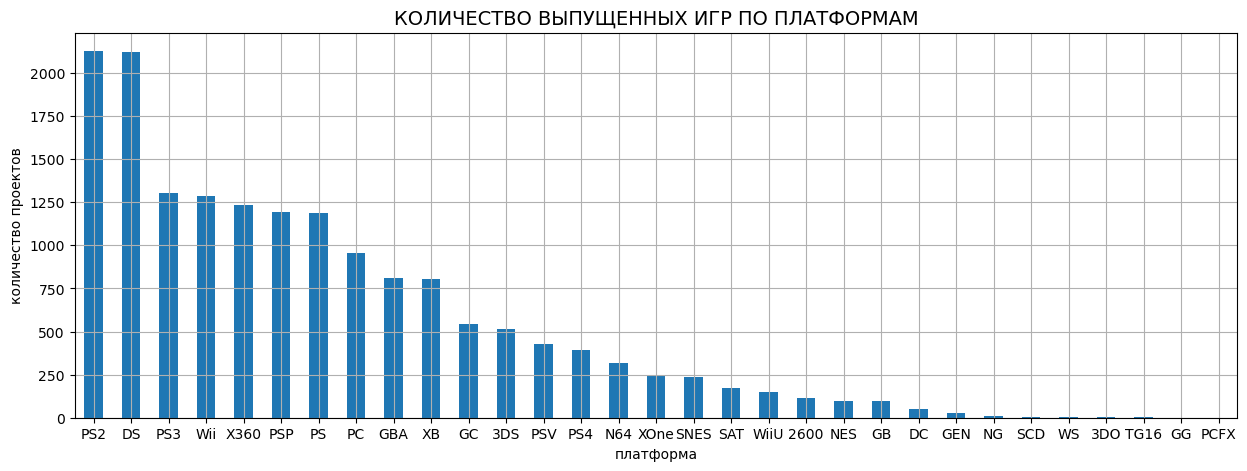

In [34]:
# сведем данные о количестве выпущенных проектов по платформам

(
    df
    .platform
    .value_counts()
    .plot(
        kind='bar',
        figsize=(15,5),
        grid=True,
        legend=False
    )
)

plt.title('КОЛИЧЕСТВО ВЫПУЩЕННЫХ ИГР ПО ПЛАТФОРМАМ', fontsize = 14, color = 'black')
plt.xlabel('платформа', fontsize = 10, color = 'black')
plt.ylabel('количество проектов', fontsize = 10, color = 'black')
plt.xticks(rotation=0)
plt.show()

Посмотрим на продажи по платформам

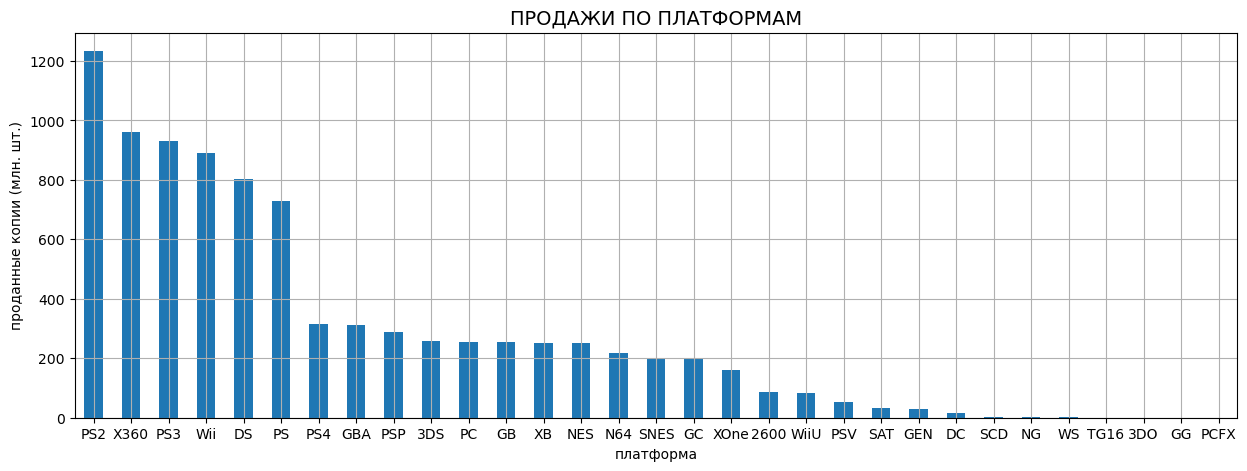

In [35]:
# при помощи сводной таблицы сгруппируем данные о выпуске игр по платформам и сохраним в отдельную переменную

sales_platforms = (
    df
    .pivot_table(
        index='platform',
        values='total_sales',
        aggfunc='sum'
    )
    .reset_index()
    .sort_values(
        by='total_sales',
        ascending=False
    )
)

# построим график продаж по платформам

sales_platforms.plot(
        kind='bar',
        x='platform',
        y='total_sales',
        figsize=(15,5),
        grid=True,
        legend=False
)

plt.title('ПРОДАЖИ ПО ПЛАТФОРМАМ', fontsize = 14, color = 'black')
plt.xlabel('платформа', fontsize = 10, color = 'black')
plt.ylabel('проданные копии (млн. шт.)', fontsize = 10, color = 'black')
plt.xticks(rotation=0)
plt.show()

Топ - 3 платформ по продажам:

1. PlayStation 2
2. Xbox 360
3. PlayStation 3

В топ-10 входят:
- 5 консолей от Sony;
- 4 консоли от Nintendo;
- XBox 360 от Microsoft;

PC на 11 месте

Также можно отметить:
- PS-2 лидирует на рынке не только по продажам, но и по количеству выпущенных игр;
- Ближайший конкурент Sony - Microsoft по количеству выпущенных игр находится только на 5 строке;
- Абсолютное доминирование на рынке видеоигр производителей консолей из Японии.

#### Анализ топ-10 платформ

Исходя из полученных выше данных сформируем список топ-10 платформ. И оценим продажи игр на этих платформах по годам

In [36]:
# на основании сохраненной ранее переменной sales_platforms сформируем список топ-10 платформ по продажам

top_10_platforms = (
    sales_platforms
    .platform
    .head(10)
    .reset_index(drop=True)
)

Посмотрим на продажи по платформам из списка топ-10

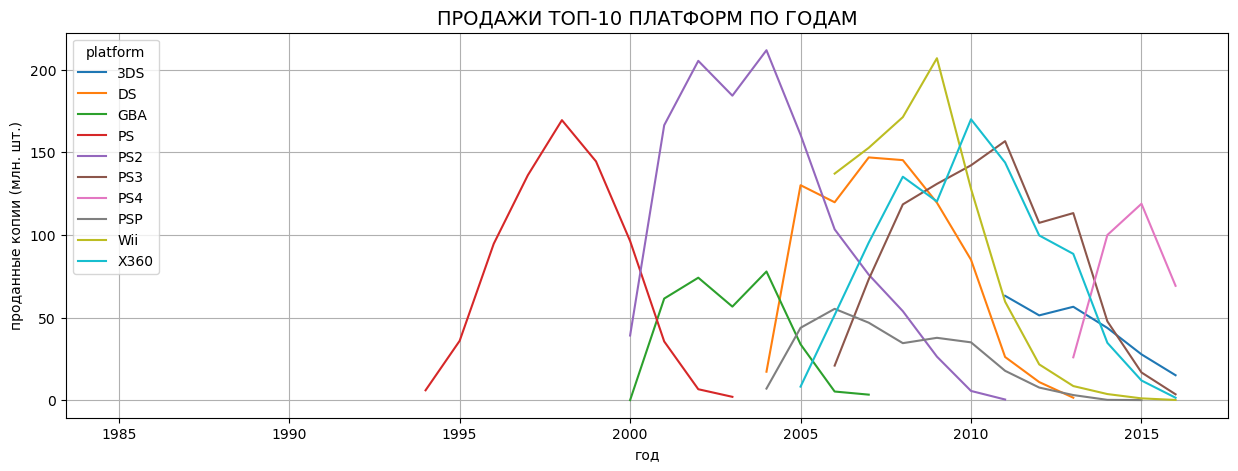

In [37]:
# выберем из датафрейма данные для платформ из списка топ-10
# при помощи сводной таблицы сгруппируем данные о продажах для платформ из топ-10 в разрезе по годам
# визуализируем полученную таблицу

(
    df
    .query('platform in @top_10_platforms')
    .pivot_table(
        index='year_of_release',
        columns='platform',
        values='total_sales',
        aggfunc='sum'
    )
    .plot(
        kind='line',
        figsize=(15,5),
        grid=True,
        legend=True
    )
)

plt.title('ПРОДАЖИ ТОП-10 ПЛАТФОРМ ПО ГОДАМ', fontsize = 14, color = 'black')
plt.xlabel('год', fontsize = 10, color = 'black')
plt.ylabel('проданные копии (млн. шт.)', fontsize = 10, color = 'black')
plt.show()

Взглянем на количество игр, выпускаемых для платформ из топ-10, в разрезе по годам

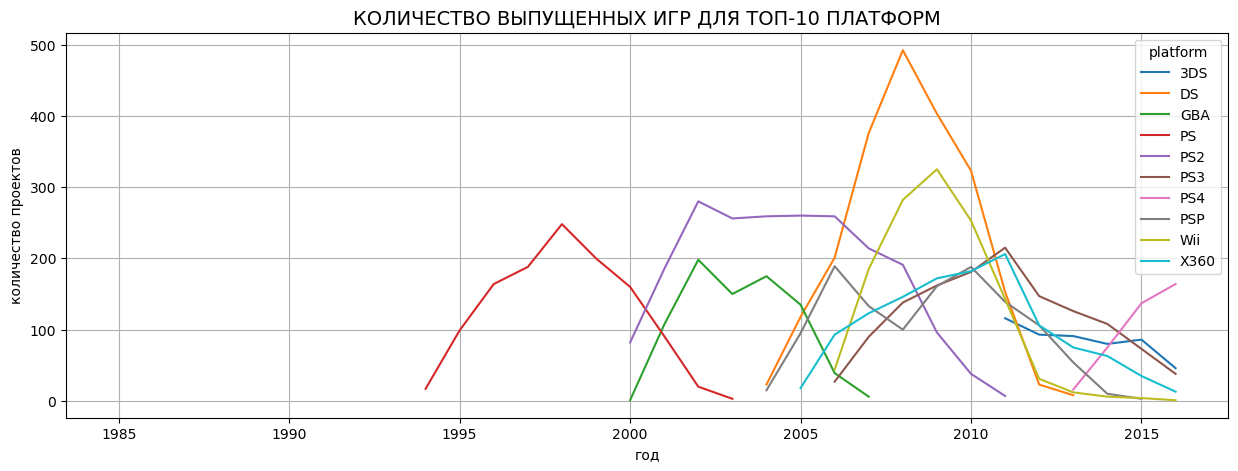

In [38]:
(
    df
    .query('platform in @top_10_platforms')
    .pivot_table(
        index='year_of_release',
        columns='platform',
        values='name',
        aggfunc='count'
    )
    .plot(
        kind='line',
        figsize=(15,5),
        grid=True,
        legend=True
    )
)

plt.title('КОЛИЧЕСТВО ВЫПУЩЕННЫХ ИГР ДЛЯ ТОП-10 ПЛАТФОРМ', fontsize = 14, color = 'black')
plt.xlabel('год', fontsize = 10, color = 'black')
plt.ylabel('количество проектов', fontsize = 10, color = 'black')
plt.show()

#### Промежуточный вывод

По состоянию на 2016 год некоторые платформы из топ-10 не актуальны. Далее, как потенциально коммерчески выгодные платформы, нет смысла рассматривать такие платформы как:

- PlayStation 1;
- PlayStation 2;
- Nintendo DS;
- Game Boy Advance (GBA).

По графикам видно, что следующие платформы заканчивают свой жизненный цикл:
- PlayStation 3;
- PlayStation Portable (PSP);
- Nintendo Wii;
- XBox 360.

По количеству новых проектов восходящий тренд показывает только свежая PlayStation 4

### Анализ продолжительности жизненного цикла платформ

Для ответа на вопрос о том как быстро платформы сменяют друг друга оценим длительность жизненного цикла платформ. Посмотрим на график выхода игр в разрезе платформ и лет. Затем посмотрим на график продаж в разрезе платформ и лет.

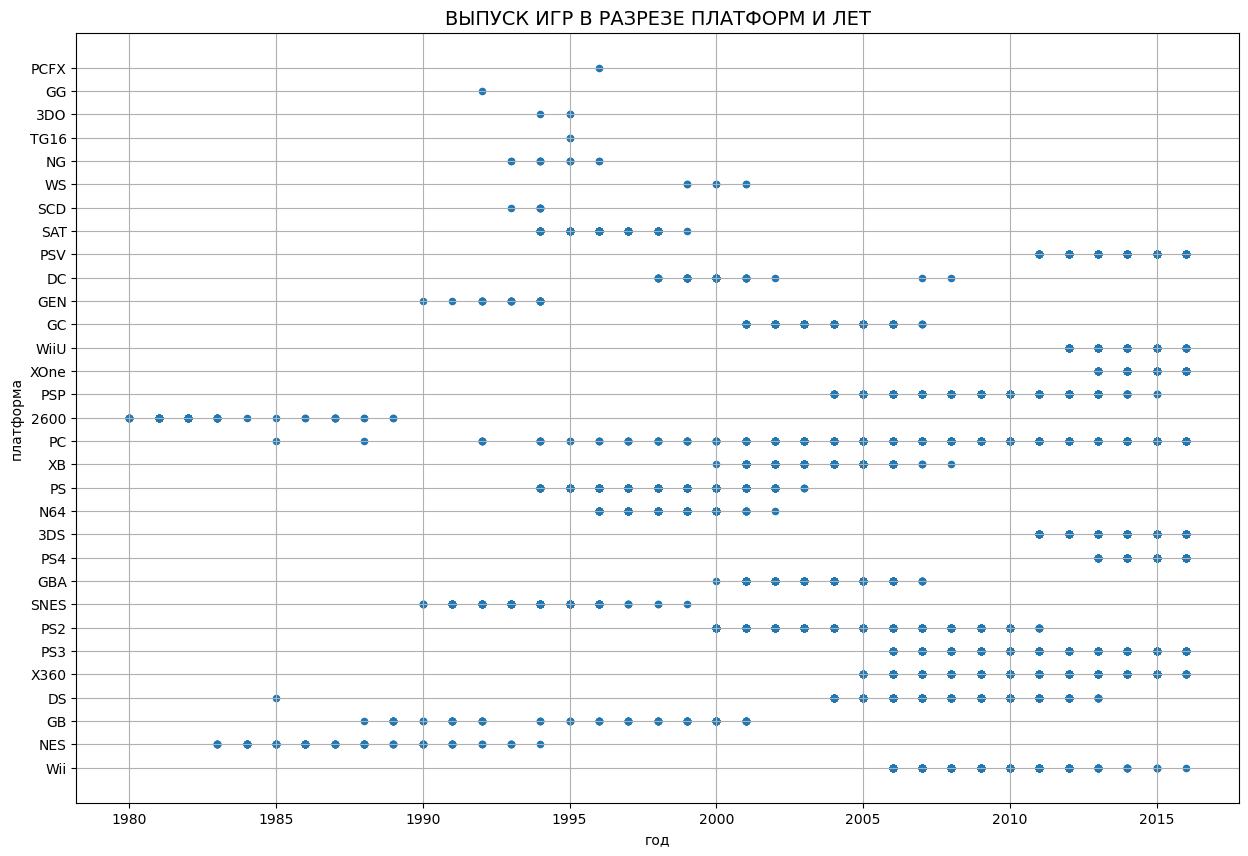

In [39]:
(
    df
    .plot(
        kind='scatter',
        x='year_of_release',
        y='platform',       
        figsize=(15,10),
        grid=True,
        legend=False
    )
)

plt.title('ВЫПУСК ИГР В РАЗРЕЗЕ ПЛАТФОРМ И ЛЕТ', fontsize = 14, color = 'black')
plt.xlabel('год', fontsize = 10, color = 'black')
plt.ylabel('платформа', fontsize = 10, color = 'black')
plt.show()

По данному графику можно заметить присутствие нескольких выбросов у платформ Nintendo DS и SEGA DC. Посмотрим на них

In [40]:
# отфильтруем проекты платформы DC, выпущенные после 2005 года

df.loc[(df['platform']=='DC') & (df['year_of_release'] > 2005)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14005,Pia Carrot e Youkoso!! 2.5,DC,2008,Adventure,0.0,0.0,0.04,0.0,NaN,NaN,Unknown,0.04
15995,Triggerheart Exelica,DC,2007,Shooter,0.0,0.0,0.02,0.0,NaN,NaN,Unknown,0.02


In [41]:
# отфильтруем проекты платформы DS, выпущенные до 1990 года

df.loc[(df['platform']=='DS') & (df['year_of_release'] < 1990)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15955,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,Unknown,0.02


Ничего полезного. Согласно информации из открытых источников проекты Strongest Tokyo University Shogi DS и Pia Carrot e Youkoso!! 2.5 имею ошибочный год выпуска. Эти строки можно удалить

In [42]:
# При помощи метода drop() удалим строки 14005 и 15955

df = (
    df
    .drop([14005, 15955])
    .reset_index(drop=True)
)

Оценим продажи игр на протяжении жизненного цикла платформ

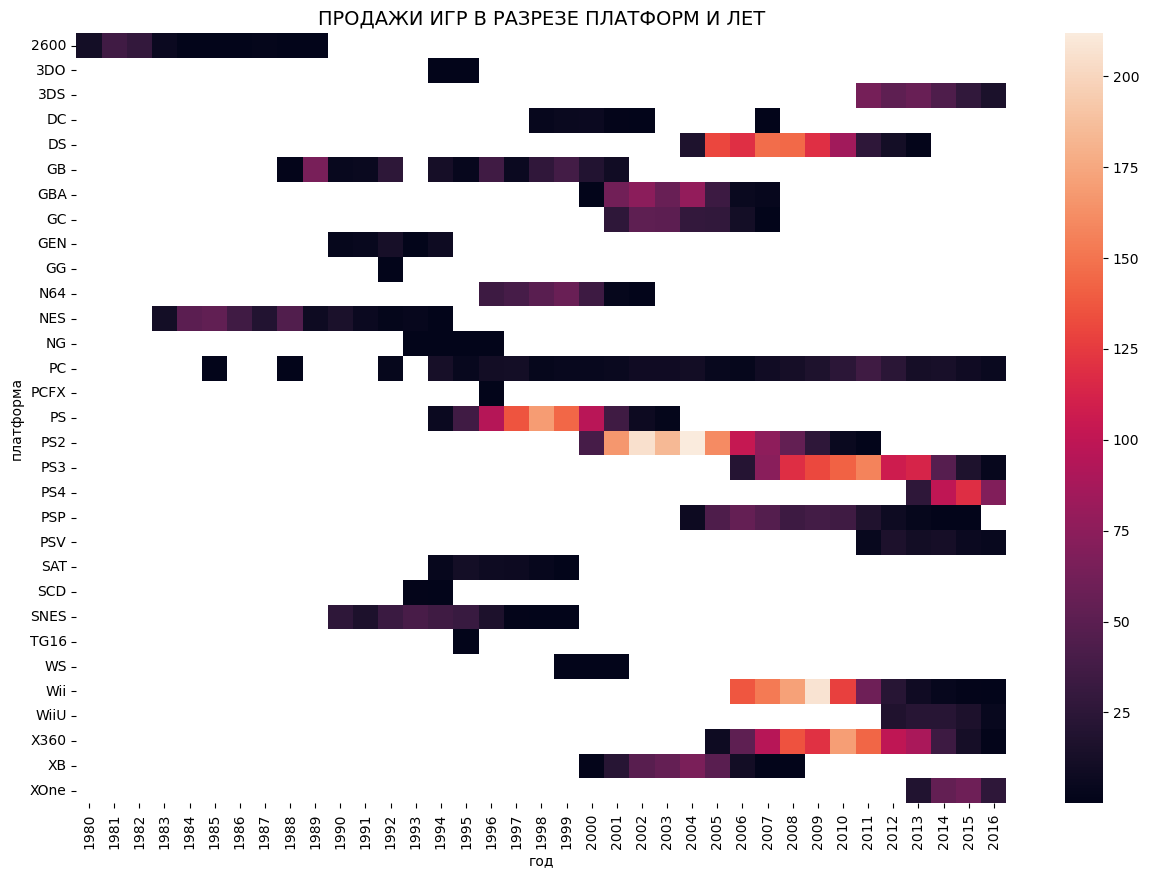

In [43]:
# при помощи сводной таблицы сгруппируем данные по продажам в разрезе платформ и лет

sales_platform_years = (
    df
    .pivot_table(
        index='platform',
        columns='year_of_release',
        values='total_sales',
        aggfunc='sum')
)

# для визуализации построим тепловую карту

plt.subplots(figsize=(15, 10))
sns.heatmap(sales_platform_years)
plt.title('ПРОДАЖИ ИГР В РАЗРЕЗЕ ПЛАТФОРМ И ЛЕТ', fontsize = 14, color = 'black')
plt.xlabel('год', fontsize = 10, color = 'black')
plt.ylabel('платформа', fontsize = 10, color = 'black')
plt.show()

Данный график подтверждает очевидный факт - продажи по платформам значительно падают в последней трети жизненного цикла. Оценим продолжительность жизненного цикла платформ

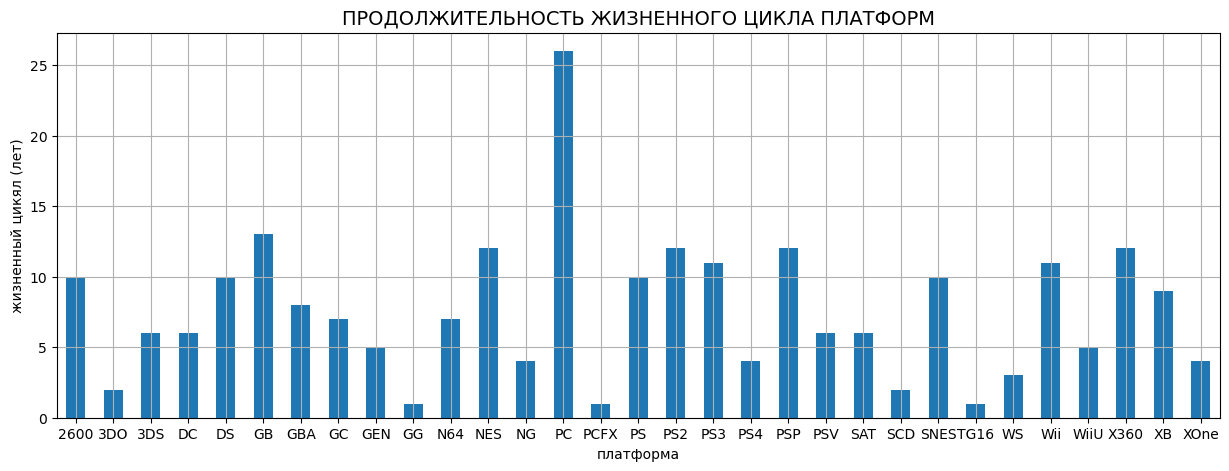

In [44]:
# для каждой платформы найдем года в течение которых для платформы выпускались ноые игры
# для этого из датафрейма сделаем срез данных со столбцами year_of_release и platform и удалим дубликаты
# при помощи сводной таблицы посчитаем для каждой платформы количество лет в течение которых для платформы выходили новые игры
# построим график жизненного цикла платформ

(
    df[['year_of_release', 'platform']]
    .drop_duplicates()
    .pivot_table(
        index='platform',
        values='year_of_release',
        aggfunc='count'
    )
    .reset_index()
    .plot(
        kind='bar',
        x='platform',
        y='year_of_release',
        figsize=(15,5),
        grid=True,
        legend=False
    )
)


plt.title('ПРОДОЛЖИТЕЛЬНОСТЬ ЖИЗНЕННОГО ЦИКЛА ПЛАТФОРМ', fontsize = 14, color = 'black')
plt.xlabel('платформа', fontsize = 10, color = 'black')
plt.ylabel('жизненный цикял (лет)', fontsize = 10, color = 'black')
plt.xticks(rotation=0)
plt.show()

Исходя из полученного графика можно сделать два вывода:

1. Примерно продолжительность жизненного цикла консольных приставок можно оценить в 5-10 лет.
2. Абсолютный лидер по продолжительности жизненного цикла - PC.

Для большей точности определим медианную продолжительность жизненного цикла платформ

In [45]:
(
    df[['year_of_release', 'platform']]
    .drop_duplicates()
    .pivot_table(
        index='platform',
        values='year_of_release',
        aggfunc='count'
    )
    .year_of_release
    .median()
)

7.0

#### Промежуточный вывод

Предположение о том, что с 1994 год рост продаж игр обеспечил выход консолей нового поколения и в частности PlayStation 1 подтвердилось.

По имеющимся данным можно сделать следующие выводы:

1. Продолжительность жизненного цикла консолей примерно 7 лет. Далее выходят обновленные модели.
2. Абсолютный лидер по продолжительности жизненного цикла - PC. Продажи игр на PC меньше других платформ, но эта платформа показывает стабильные продажи на протяжении многих лет.
3. Платформа, показывающая рост продаж по состоянию на 2016 год - PlayStation 4.

С коммерческой точки зрения для нас интересны платформы в начале жизненного цикла и платформы, находящиеся на его пике:

- PC;
- PlayStation Vita;
- Nintendo WiiU;
- XBox One;
- PlayStation 4
- Nintendo 3DS

4. Как коммерчески привлекательные (с некоторыми ограничениями) можно рассматривать платформы, заканчивающие жизненный цикл: PlayStation 3, PlayStation Portable (PSP), Nintendo Wii, Nintendo 3DS, Nintendo DS, XBox 360.

### Выбор актуального временного периода для оценки

Основываясь на данных о продажах и о продолжительности жизненного цикла платформ, полученных в пунктах 3.1 и 3.2., опраделим актуальный период с 2012 года. Причины:

1. Продажи после снижения с пика в 2008 году стабилизировались на постоянном уровне с 2012 года.
2. К этому году уже закончился жизненный цикл устаревших платформ: PlayStation 1, PlayStation 2, Nintendo DS и Game Boy Advance (GBA).
3. В активной стадии находятся платформы прошлого поколения: PlayStation 3, PlayStation Portable (PSP), Nintendo Wii, XBox 360.
4. Активно развиваются модели актуального поколения: PlayStation Vita, Nintendo WiiU, XBox One, PlayStation 4, Nintendo 3DS.

Для дальнейшего анализа сделаем срез датафрейма с 2012 года.

In [46]:
data = (
    df.copy()
    .loc[df['year_of_release'] >= 2012]
)

In [47]:
# контроль обработки

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2885 entries, 16 to 16440
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2885 non-null   object 
 1   platform         2885 non-null   object 
 2   year_of_release  2885 non-null   int32  
 3   genre            2885 non-null   object 
 4   na_sales         2885 non-null   float64
 5   eu_sales         2885 non-null   float64
 6   jp_sales         2885 non-null   float64
 7   other_sales      2885 non-null   float64
 8   critic_score     1311 non-null   float64
 9   user_score       1530 non-null   float64
 10  rating           2885 non-null   object 
 11  total_sales      2885 non-null   float64
dtypes: float64(7), int32(1), object(4)
memory usage: 281.7+ KB


In [48]:
# контроль обработки

data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,2885.000000,2885.000000,2885.000000,2885.000000,2885.000000,1311.000000,1530.000000,2885.000000
mean,2013.917504,0.204842,0.175671,0.066752,0.054128,72.250191,6.636863,0.501393
std,1.411559,0.566781,0.505424,0.241614,0.164664,12.688455,1.569277,1.249340
min,2012.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.200000,0.010000
25%,2013.000000,0.000000,0.000000,0.000000,0.000000,66.000000,5.800000,0.040000
50%,2014.000000,0.030000,0.030000,0.010000,0.010000,74.000000,7.000000,0.120000
75%,2015.000000,0.170000,0.140000,0.050000,0.040000,81.000000,7.800000,0.430000
max,2016.000000,9.660000,9.090000,4.390000,3.960000,97.000000,9.300000,21.050000


### Анализ продаж по платформам за актуальный период

Для оценки продаж по актуальным платформам за период с 2012 по 2016 годы построим графики:

- Количества выпущенных игр по каждой платформе;
- Продаж по каждой платформе;
- Количества выпущенных игр по годам для каждой платформы;
- Продаж по годам для каждой платформы.

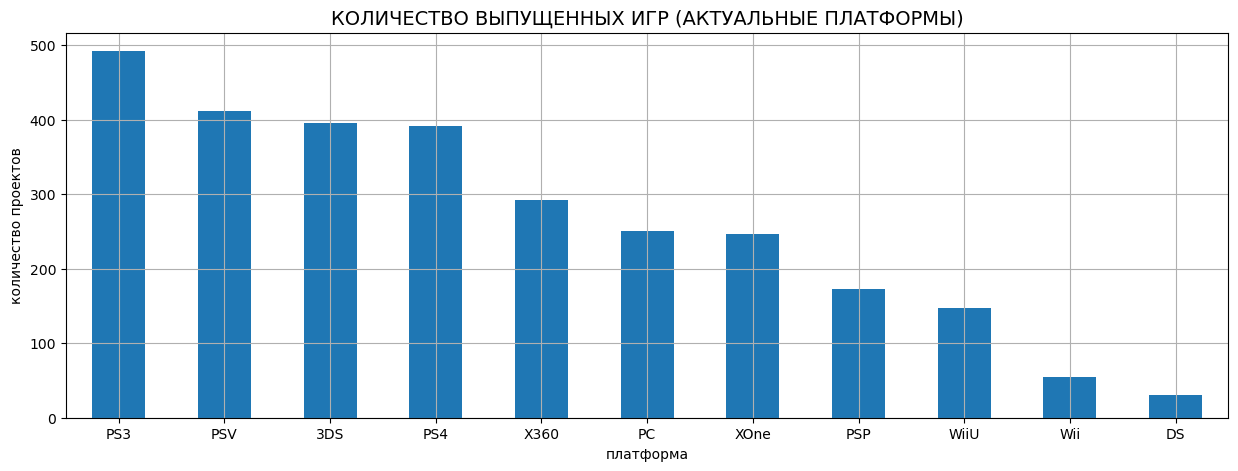

In [49]:
# график количества выпущенных проектов по каждой платформе

(
    data
    .platform
    .value_counts()
    .plot(
        kind='bar',
        figsize=(15,5),
        grid=True,
        legend=False
    )
)

plt.title('КОЛИЧЕСТВО ВЫПУЩЕННЫХ ИГР (АКТУАЛЬНЫЕ ПЛАТФОРМЫ)', fontsize = 14, color = 'black')
plt.xlabel('платформа', fontsize = 10, color = 'black')
plt.ylabel('количество проектов', fontsize = 10, color = 'black')
plt.xticks(rotation=0)
plt.show()

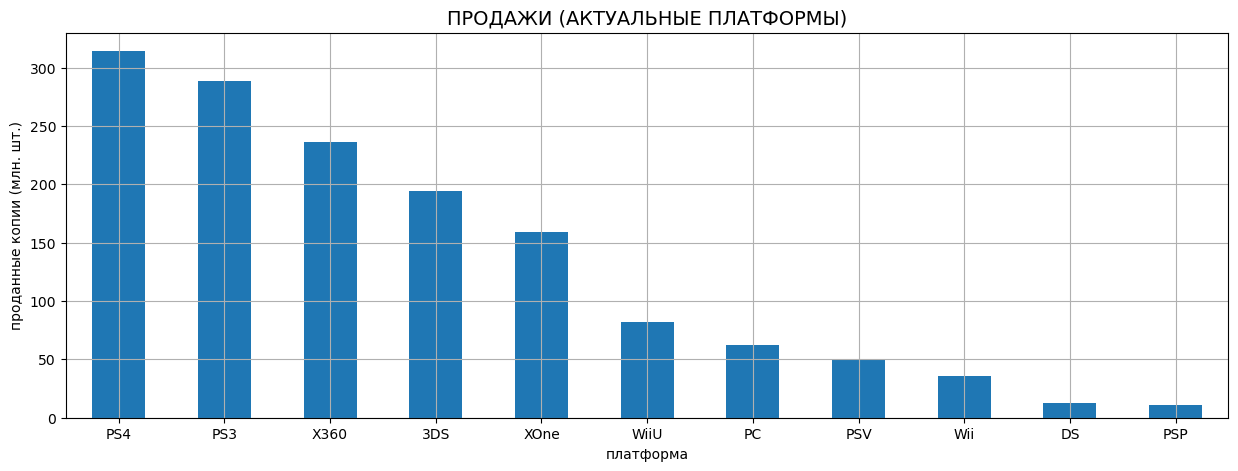

In [50]:
# график продаж по каждой платформе

(
    data
    .groupby('platform')
    .total_sales
    .sum()
    .sort_values(ascending=False)
    .plot(
        kind='bar',
        x='platform',
        y='total_sales',
        figsize=(15,5),
        grid=True,
        legend=False
    )
)

plt.title('ПРОДАЖИ (АКТУАЛЬНЫЕ ПЛАТФОРМЫ)', fontsize = 14, color = 'black')
plt.xlabel('платформа', fontsize = 10, color = 'black')
plt.ylabel('проданные копии (млн. шт.)', fontsize = 10, color = 'black')
plt.xticks(rotation=0)
plt.show()

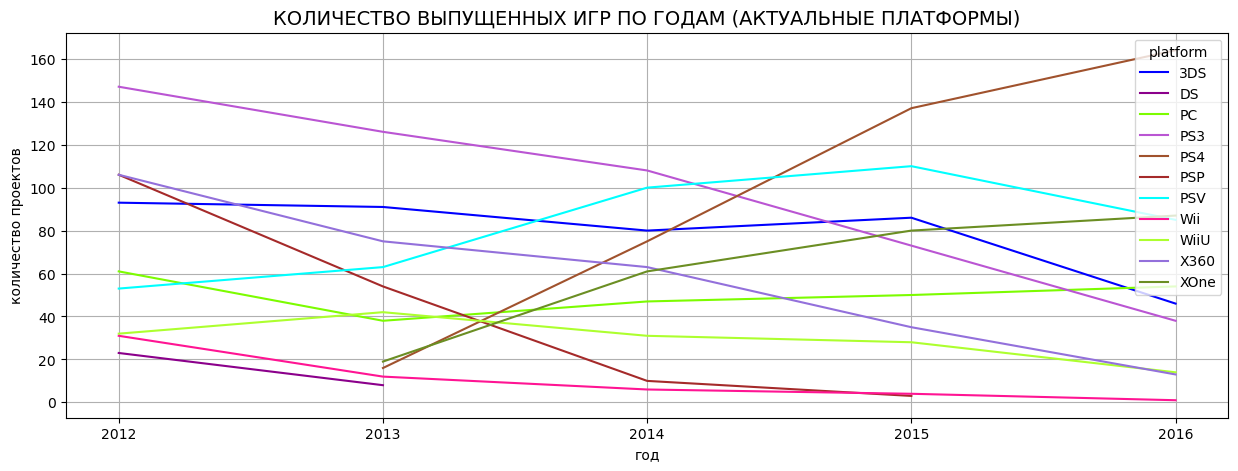

In [51]:
# график количества выпущенных игр по годам для каждой платформы;

(
    data
    .pivot_table(
        index='year_of_release',
        columns='platform',
        values='name',
        aggfunc='count'
    )
    .plot(
        kind='line',
        figsize=(15,5),
        grid=True,
        legend=True,
        color=['#0000FF', '#8B008B', '#7CFC00', '#BA55D3', '#A0522D', '#A52A2A', '#00FFFF', '#FF1493', '#ADFF2F', '#9370DB', '#6B8E23']
    )
)

plt.title('КОЛИЧЕСТВО ВЫПУЩЕННЫХ ИГР ПО ГОДАМ (АКТУАЛЬНЫЕ ПЛАТФОРМЫ)', fontsize = 14, color = 'black')
plt.xlabel('год', fontsize = 10, color = 'black')
plt.ylabel('количество проектов', fontsize = 10, color = 'black')
plt.xticks(list(data.year_of_release.unique()))
plt.show()

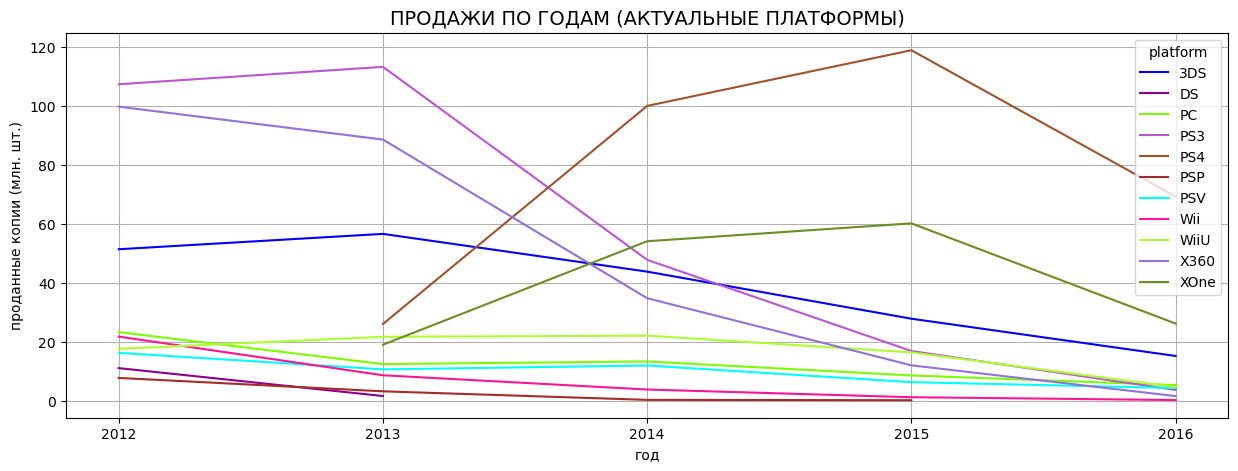

In [52]:
# график продаж по годам для каждой платформы.

(
    data    
    .pivot_table(
    index='year_of_release',
    columns='platform',
    values='total_sales',
    aggfunc='sum'
    )
    .plot(
        kind='line',
        figsize=(15,5),
        grid=True,
        legend=True,
        color=['#0000FF', '#8B008B', '#7CFC00', '#BA55D3', '#A0522D', '#A52A2A', '#00FFFF', '#FF1493', '#ADFF2F', '#9370DB', '#6B8E23']
    )
)

plt.title('ПРОДАЖИ ПО ГОДАМ (АКТУАЛЬНЫЕ ПЛАТФОРМЫ)', fontsize = 14, color = 'black')
plt.xlabel('год', fontsize = 10, color = 'black')
plt.ylabel('проданные копии (млн. шт.)', fontsize = 10, color = 'black')
plt.xticks(list(data.year_of_release.unique()))
plt.show()

#### Промежуточный вывод



Но основании данных графиков можно сделать вывод, что самые выгодные с коммерческой точки зрения платформы:

1. PlayStation 4: актуальная платформа с растущими продажами и увеличивающимся количеством выпускаемых игровых проектов.
2. Microsoft XBox One: актуальная платформа; имеет высокие продажи и увеличивающееся количество выпускаемых проектов.
3. Nintendo 3DS: платформа на 4 месте по продажам и на 3 месте по количеству выпускаемых проектов; одна из самых свежих платформ вместе с PlayStation V.

Эти 3 платформы только начали свой жизненный цикл и имеют большой потенциал роста.

Также можно обратить внимание на следующие платформы:

1. PlayStation Vita: новая платформа; не лидер по продажам, но имеет большой потенциал за счет большого количества выпускаемых проектов.
2. Nintendo WiiU: актуальная платформа; на данный момент не лидер по продажам, но имеет большой потенциал.
3. PC: небольшие но стабильные продажи на протяжении многих лет; показывает рост продаж в последние годы.
4. PlayStation 3 и Microsoft XBox 360: устаревающие платформы, но еще имеющие некоторый потенциал роста

Nintendo Wii, DS и PSP на настоящий момент уже не актуальны. Вкладывать деньги в продвижение по этим платформам не целесообразно.

### Анализ продаж по платформам в разрезе выпускаемых проектов

Для анализа продаж по платформам построим боксплот.

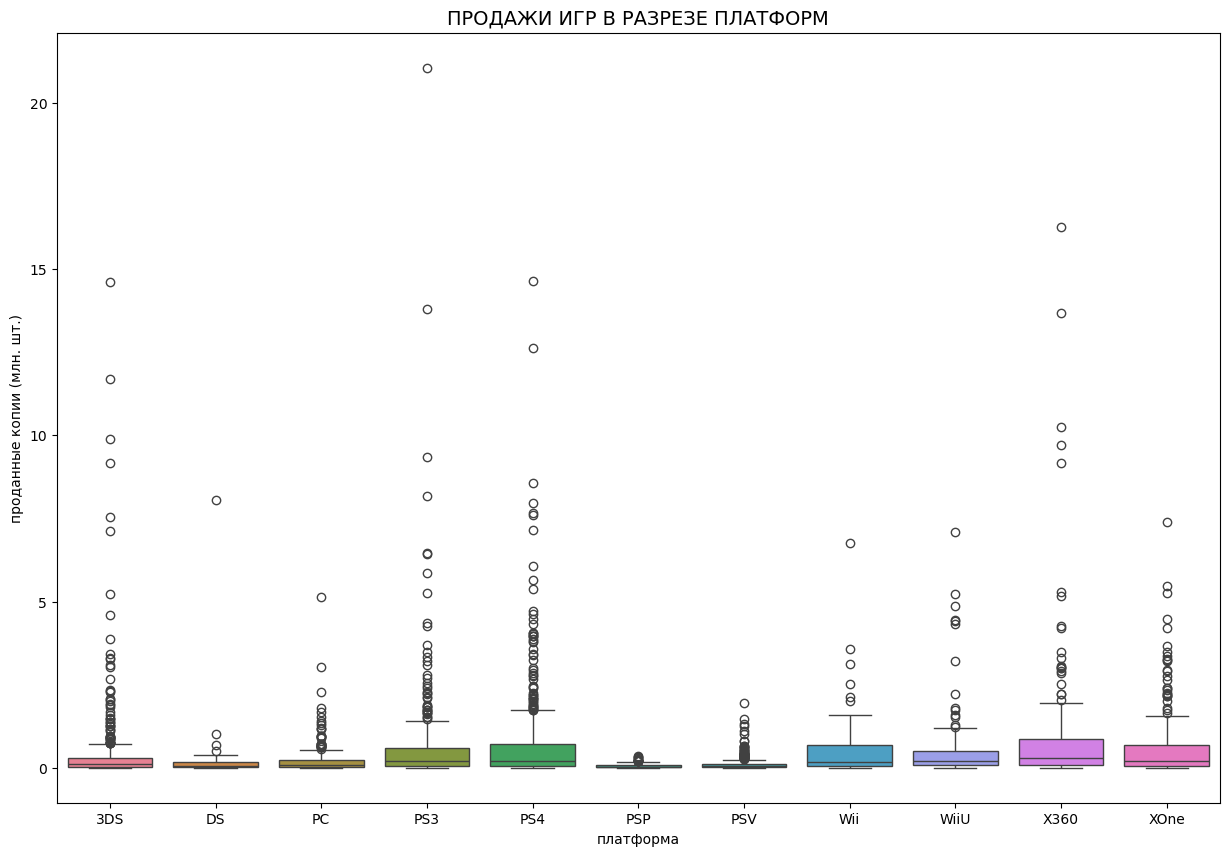

In [53]:
# при помощи сводной таблицы сгруппируем данные для анализа и сохраним в переменной

sales_names_platform = (
    data
    .pivot_table(
        index='name',
        columns='platform',
        values='total_sales',
        aggfunc='sum'
    )
)

# строим график
plt.subplots(figsize=(15, 10))
sns.boxplot(data=sales_names_platform)

plt.title('ПРОДАЖИ ИГР В РАЗРЕЗЕ ПЛАТФОРМ', fontsize = 14, color = 'black')
plt.xlabel('платформа', fontsize = 10, color = 'black')
plt.ylabel('проданные копии (млн. шт.)', fontsize = 10, color = 'black')
plt.show()

Проведению анализа мешают выбросы - проекты с большим количеством проданных копий. Для большей наглядности перестроим график с ограничение по оси Y и сортировкой по значению медианных продаж

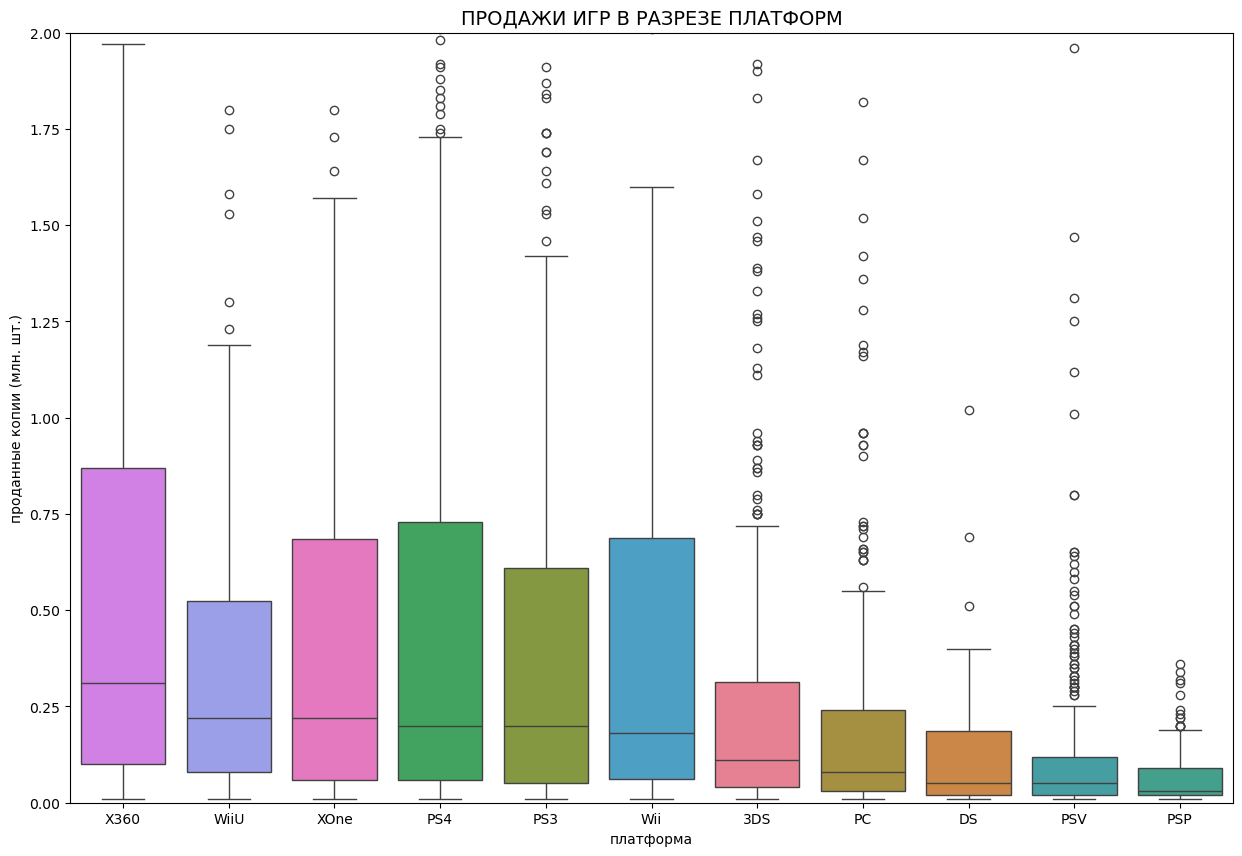

In [54]:
# создадим список платформ для сортировки
order = data.groupby('platform').total_sales.median().sort_values(ascending=False).index

# строим график
plt.subplots(figsize=(15, 10))
sns.boxplot(data=sales_names_platform, order=order)

plt.title('ПРОДАЖИ ИГР В РАЗРЕЗЕ ПЛАТФОРМ', fontsize = 14, color = 'black')
plt.xlabel('платформа', fontsize = 10, color = 'black')
plt.ylabel('проданные копии (млн. шт.)', fontsize = 10, color = 'black')
plt.ylim([0, 2])
plt.show()

Среди всех платформ можно выделить 6 платформ с самыми стабильными высокими продажами: XBox 360, Nintendo WiiU, XBox One, PS4, PS3, Nintendo Wii. Из них в пункте 3.5. перспективными с коммерческой точки зрения мы выделили PS4, XBox One, Nintendo WiiU

На первом графике мы отмечали большое количество выбросов - хитов продаж. За актуальный период можно отметить наличие большого количества таких хитов у двух платформ: PlayStation 3 и Microsoft XBox 360. Взглянем на эти выбросы

In [55]:
(
    data.query('platform==["PS3", "X360"]')
    .groupby(['platform', 'name'])
    .total_sales
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

platform  name                      
PS3       Grand Theft Auto V            21.05
X360      Grand Theft Auto V            16.27
PS3       Call of Duty: Black Ops II    13.79
X360      Call of Duty: Black Ops II    13.68
          Call of Duty: Ghosts          10.24
          Halo 4                         9.71
PS3       Call of Duty: Ghosts           9.36
X360      Minecraft                      9.18
PS3       FIFA Soccer 13                 8.17
          FIFA 14                        6.46
Name: total_sales, dtype: float64

Топ 3 проекта для этих платформ одинаковые:

1. Grand Theft Auto V.
2. Call of Duty: Black Ops II
3. Call of Duty: Ghosts

Также можно отметить, что первые два проекта имели большую популярность на PS3, а трейтий имел больше продаж на XBox 360.

Теперь взглянем на хиты по платформам, отобранным как коммерчески привлекательные: PlayStation 4, Microsoft XBox One, Nintendo 3DS.

In [56]:
(
    data.query('platform==["PS4", "XOne", "3DS"]')
    .groupby(['platform', 'name'])
    .total_sales
    .sum()
    .sort_values(ascending=False)
    .head(20)
)

platform  name                                     
PS4       Call of Duty: Black Ops 3                    14.63
3DS       Pokemon X/Pokemon Y                          14.60
PS4       Grand Theft Auto V                           12.62
3DS       Pokemon Omega Ruby/Pokemon Alpha Sapphire    11.68
          New Super Mario Bros. 2                       9.90
          Animal Crossing: New Leaf                     9.17
PS4       FIFA 16                                       8.58
          Star Wars Battlefront (2015)                  7.98
          Call of Duty: Advanced Warfare                7.66
          FIFA 17                                       7.60
3DS       Super Smash Bros. for Wii U and 3DS           7.55
XOne      Call of Duty: Black Ops 3                     7.39
PS4       Fallout 4                                     7.17
3DS       Pokemon Sun/Moon                              7.14
PS4       FIFA 15                                       6.08
          Destiny                

В этом случае топ-3 различается.

В случае PS4 это:
1. Call of Duty: Black Ops 3
2. Grand Theft Auto V
3. FIFA 16

Для DS3 это:
1. Pokemon X/Pokemon Y
2. Pokemon Omega Ruby/Pokemon Alpha Sapphire
3. New Super Mario Bros. 2

В случае XBox One это:
1. Call of Duty: Black Ops 3
2. Grand Theft Auto V
3. Call of Duty: Advanced Warfare

Проекты XBox One не попадают в топ-10 продаж (Call of Duty: Black Ops 3 только на 12 строке). 
Также можно обратить внимание на различные жанровые предпочтения пользователей PS4 и DS3, вызванные различным типом приставок. Поэтому в данном случае уместнее сравнивать продажи у платформ PS4 и XBox One. Тогда можно отметить что для PS4 выпускается намного больше проектов с большими продажами, хотя платформы были выпушены в одно время.

Посмотрим на продажи Call of Duty: Black Ops 3 и Grand Theft Auto V по платформам.

In [57]:
(
    data.query('name==["Call of Duty: Black Ops 3", "Grand Theft Auto V"]')
    .groupby(['name', 'platform'])
    .total_sales
    .sum()    
    .head(15)
)

name                       platform
Call of Duty: Black Ops 3  PC           0.26
                           PS3          1.69
                           PS4         14.63
                           X360         1.70
                           XOne         7.39
Grand Theft Auto V         PC           1.17
                           PS3         21.05
                           PS4         12.62
                           X360        16.27
                           XOne         5.47
Name: total_sales, dtype: float64

Можно заметить, что данные игры продавались на двух поколениях приставок Sony и Microsoft.

#### Промежуточный вывод

Проанализировав графики распределения продаж по платформам в разрезе проектов можно выделить 6 платформ с самыми стабильными высокими продажами: XBox 360, Nintendo WiiU, XBox One, PS4, PS3, Nintendo Wii. Из них в пункте 3.5. перспективными с коммерческой точки зрения мы выделили PS4, XBox One, Nintendo WiiU
Построив boxplot для актуального и всего периода можно увидеть выбросы (проекты-хиты) в продажах для каждой платформы.

В топ-3 проектов для платформ, перспективных с коммерческой точки зрения

PS4:
1. Call of Duty: Black Ops 3
2. Grand Theft Auto V
3. FIFA 16

DS3:
1. Pokemon X/Pokemon Y
2. Pokemon Omega Ruby/Pokemon Alpha Sapphire
3. New Super Mario Bros. 2

XBox One:
1. Call of Duty: Black Ops 3
2. Grand Theft Auto V
3. Call of Duty: Advanced Warfare


### Анализ корреляции между отзывами и продажами

Проверим наличие зависимости между продажами и оценками критиков и пользователей для самой успешной платформы (платформы с самым большим количеством выпущеных проектов и самыми большими продажами) - PS2

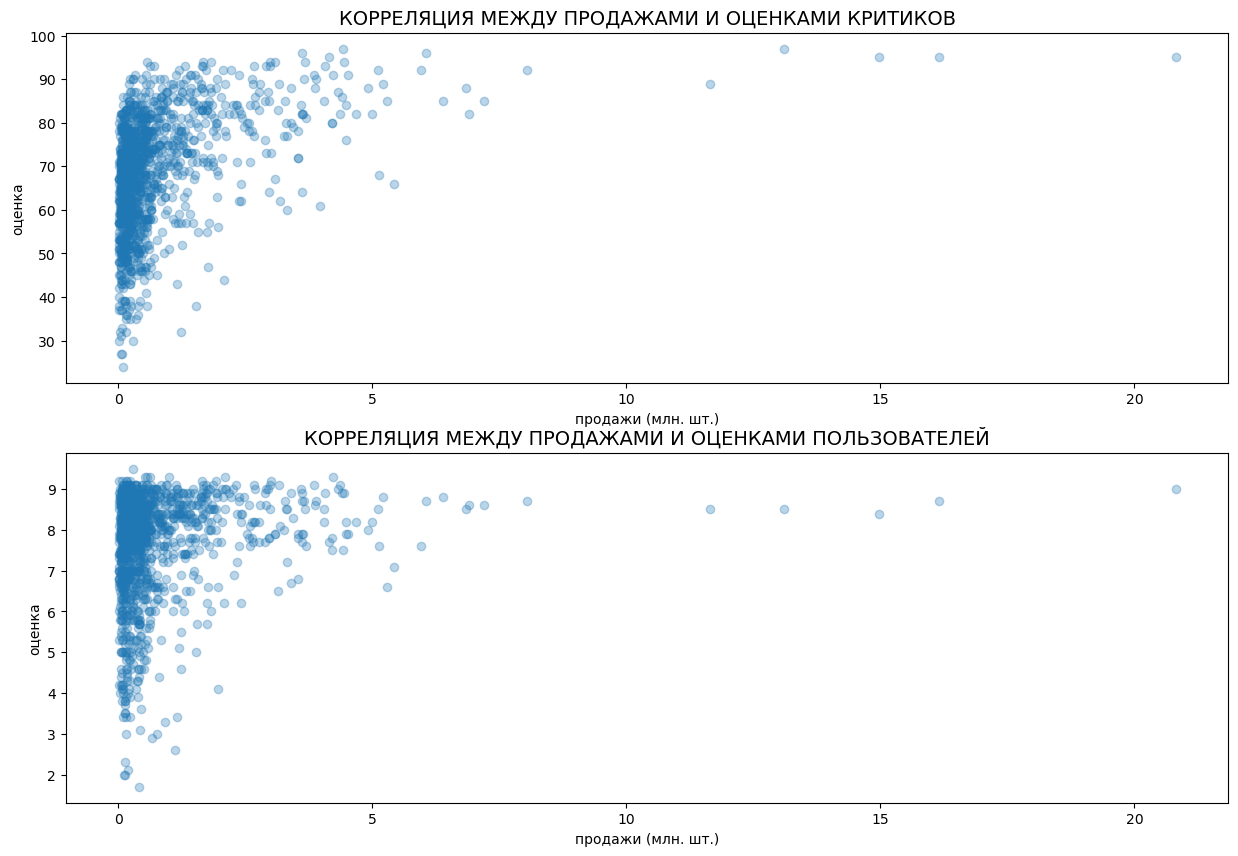

In [58]:
# выберем из датафрейма данные по консоли PS2
ps2 = df.query('platform=="PS2"')

# построим графики корреляции
# продаж и оценок критиков
fig, ax = plt.subplots(2, figsize=(15,10))
ax[0].scatter(x = ps2.total_sales, y = ps2.critic_score, alpha=0.3);
ax[0].set_title('КОРРЕЛЯЦИЯ МЕЖДУ ПРОДАЖАМИ И ОЦЕНКАМИ КРИТИКОВ', fontsize = 14, color = 'black');
ax[0].set_xlabel('продажи (млн. шт.)', fontsize = 10, color = 'black');
ax[0].set_ylabel('оценка', fontsize = 10, color = 'black');

# продаж и оценок пользователей
ax[1].scatter(x = ps2.total_sales, y = ps2.user_score, alpha=0.3);
ax[1].set_title('КОРРЕЛЯЦИЯ МЕЖДУ ПРОДАЖАМИ И ОЦЕНКАМИ ПОЛЬЗОВАТЕЛЕЙ', fontsize = 14, color = 'black');
ax[1].set_xlabel('продажи (млн. шт.)', fontsize = 10, color = 'black');
ax[1].set_ylabel('оценка', fontsize = 10, color = 'black');

In [59]:
# коэффициенты корреляции

print('Корреляция между оценками критиков и продажами:', ps2.total_sales.corr(ps2.critic_score))
print('Корреляция между оценками пользователей и продажами:', ps2.total_sales.corr(ps2.user_score))

Корреляция между оценками критиков и продажами: 0.3925364754450903
Корреляция между оценками пользователей и продажами: 0.1750550277038373


По полученным данным можно сделать вывод, что между продажами и оценками критиков есть средняя корреляция. Зависимость между продажами и отзывами пользователей отсутствует.
Проверим эти выводы на платформах, отобранных для актуального временного периода.

****************************************************************************************************
Платформа: PS3


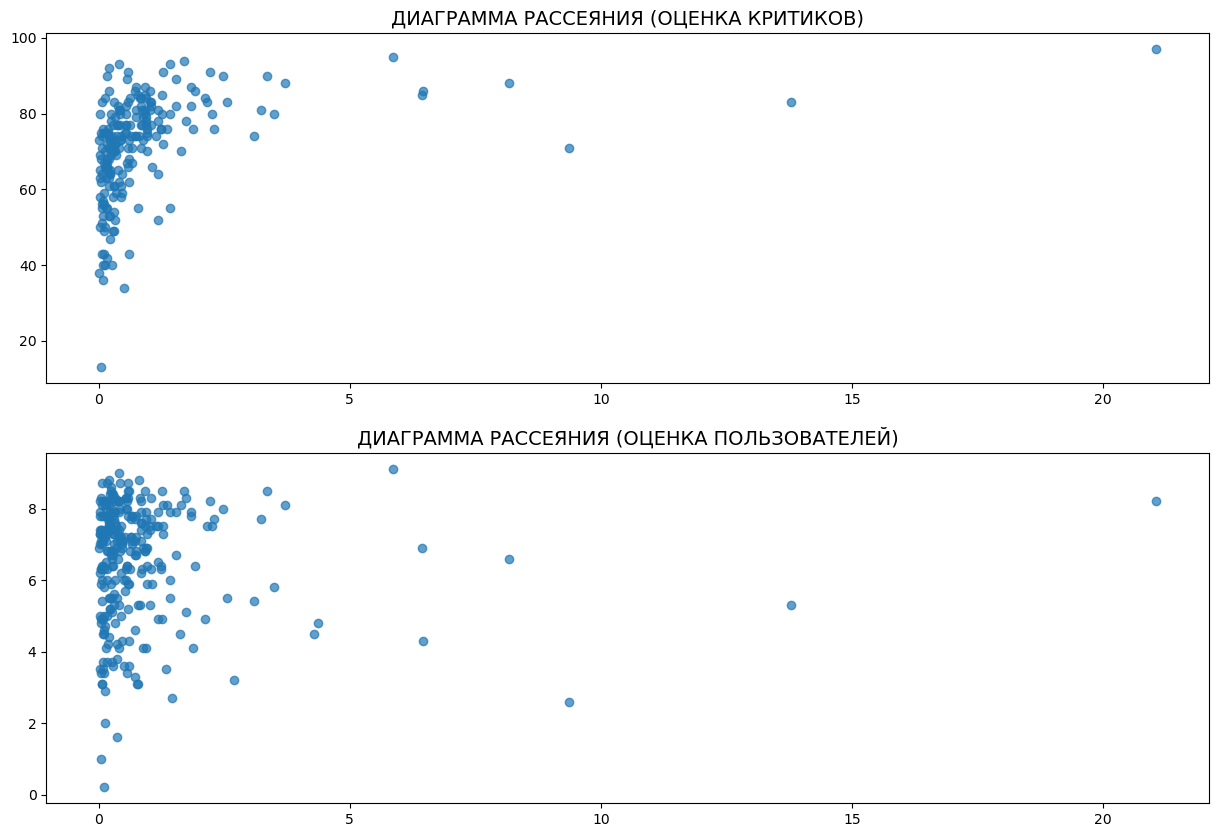

Коэффициент корреляция между оценками критиков и продажами: 0.33415175755098564
Коэффициент корреляция между между оценками пользователей и продажами: -0.006205767686051512

****************************************************************************************************
Платформа: X360


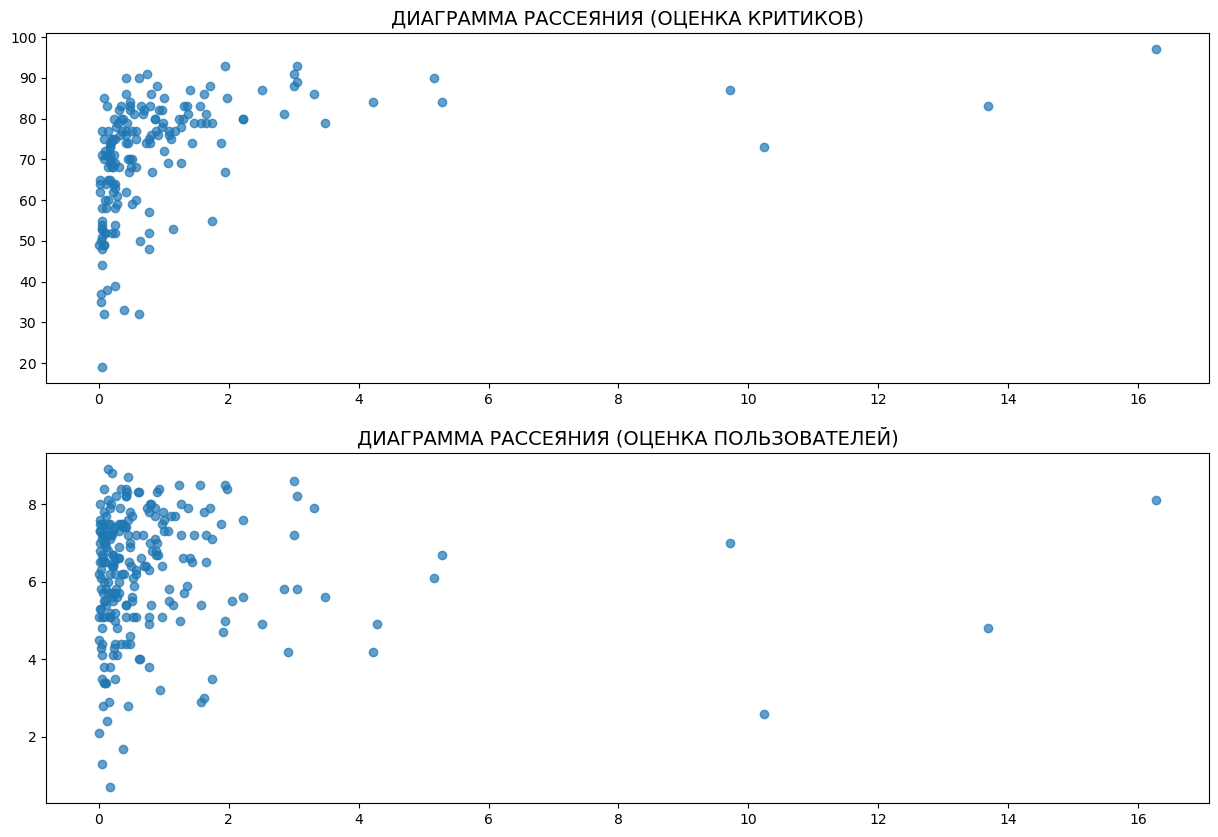

Коэффициент корреляция между оценками критиков и продажами: 0.36057348885073387
Коэффициент корреляция между между оценками пользователей и продажами: 0.0061639786462133585

****************************************************************************************************
Платформа: PS4


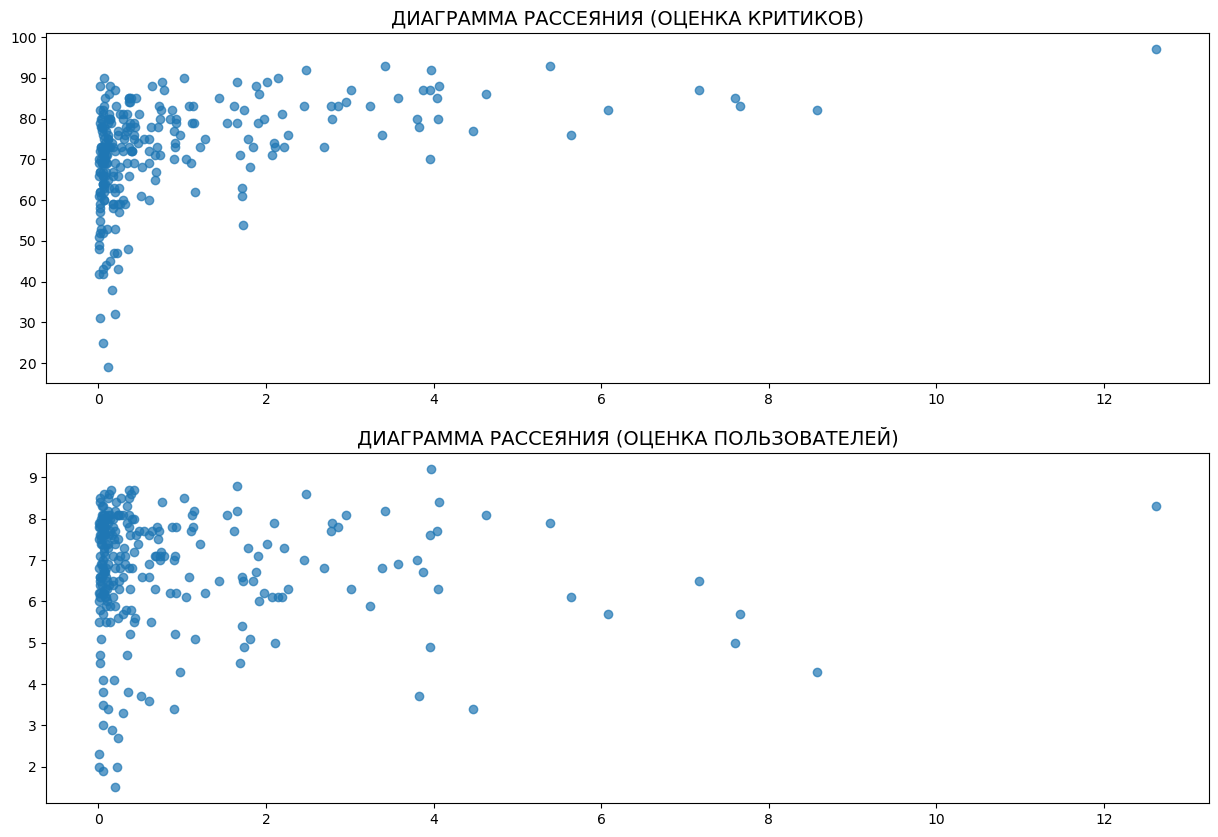

Коэффициент корреляция между оценками критиков и продажами: 0.40656790206178123
Коэффициент корреляция между между оценками пользователей и продажами: -0.03195711020455643

****************************************************************************************************
Платформа: 3DS


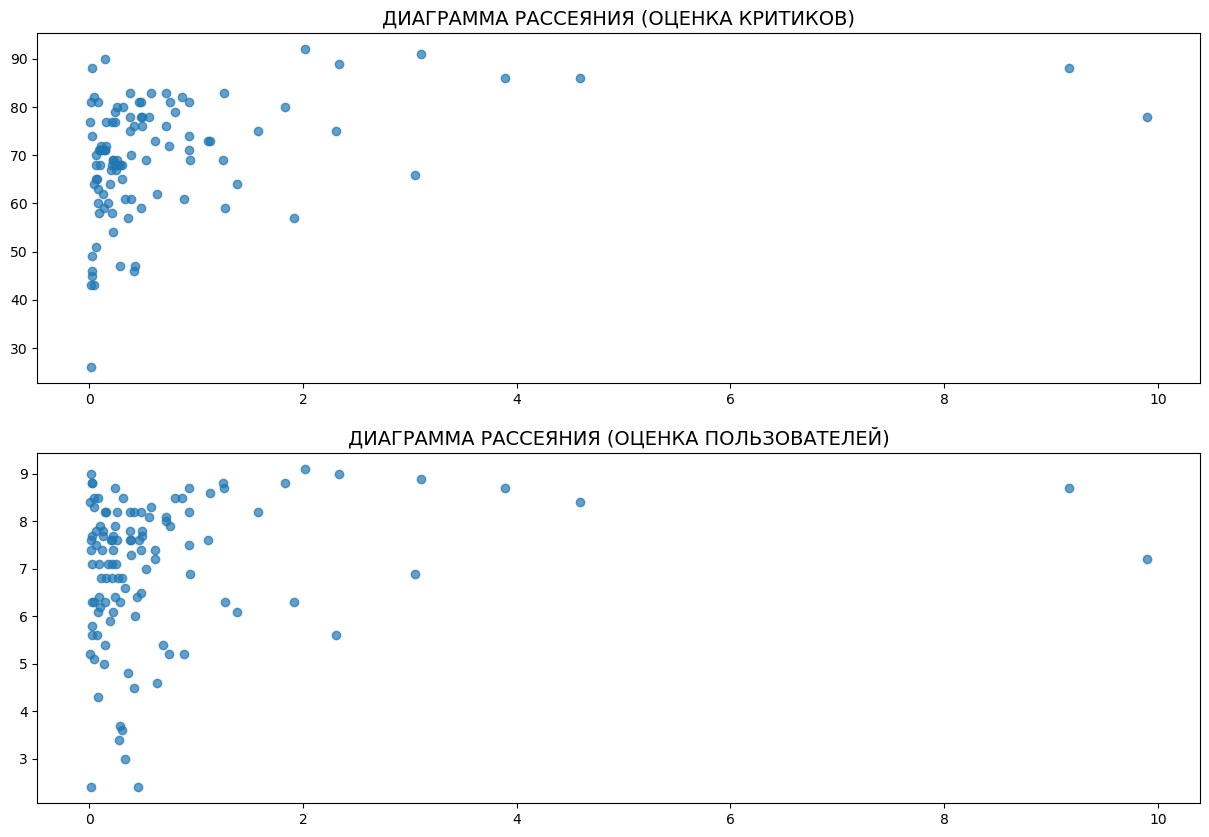

Коэффициент корреляция между оценками критиков и продажами: 0.32080286953607856
Коэффициент корреляция между между оценками пользователей и продажами: 0.19758263411038596

****************************************************************************************************
Платформа: DS
Для платформы мало данных для расчета

****************************************************************************************************
Платформа: XOne


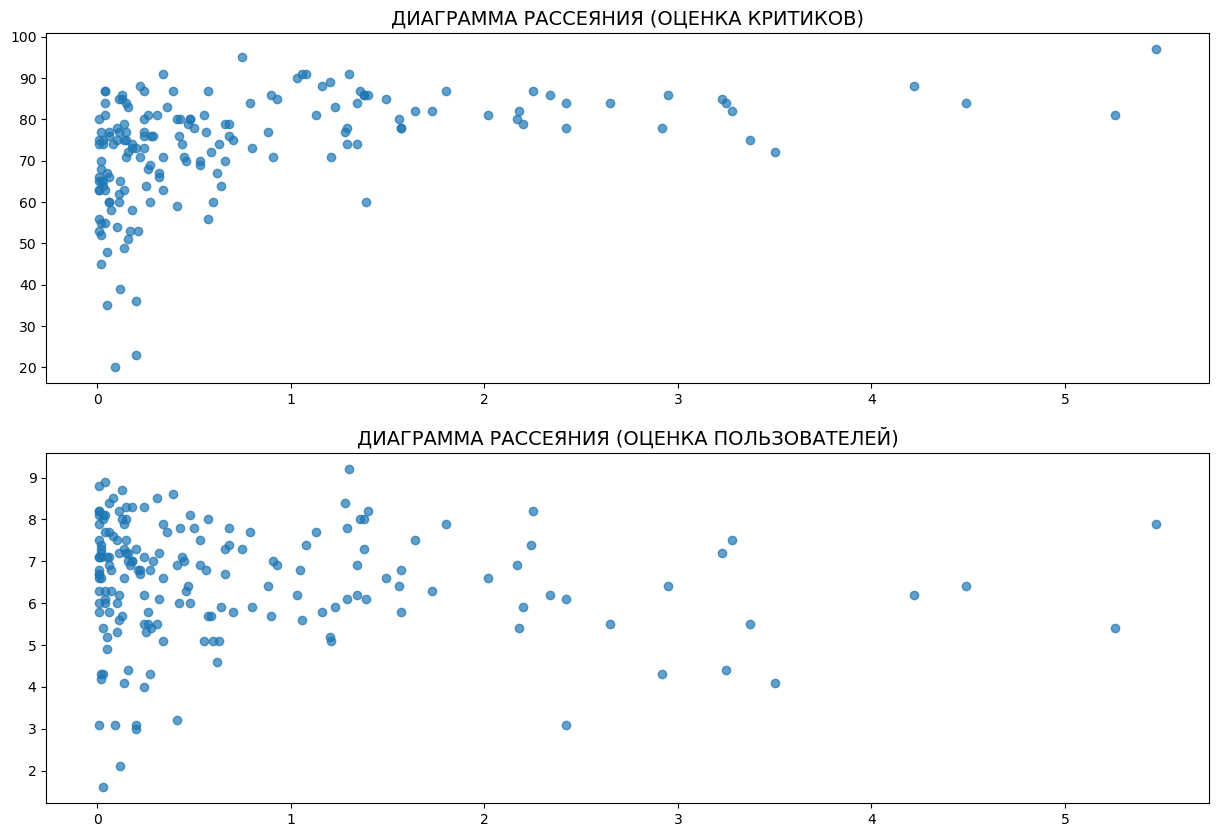

Коэффициент корреляция между оценками критиков и продажами: 0.41699832800840153
Коэффициент корреляция между между оценками пользователей и продажами: -0.06892505328279418

****************************************************************************************************
Платформа: WiiU


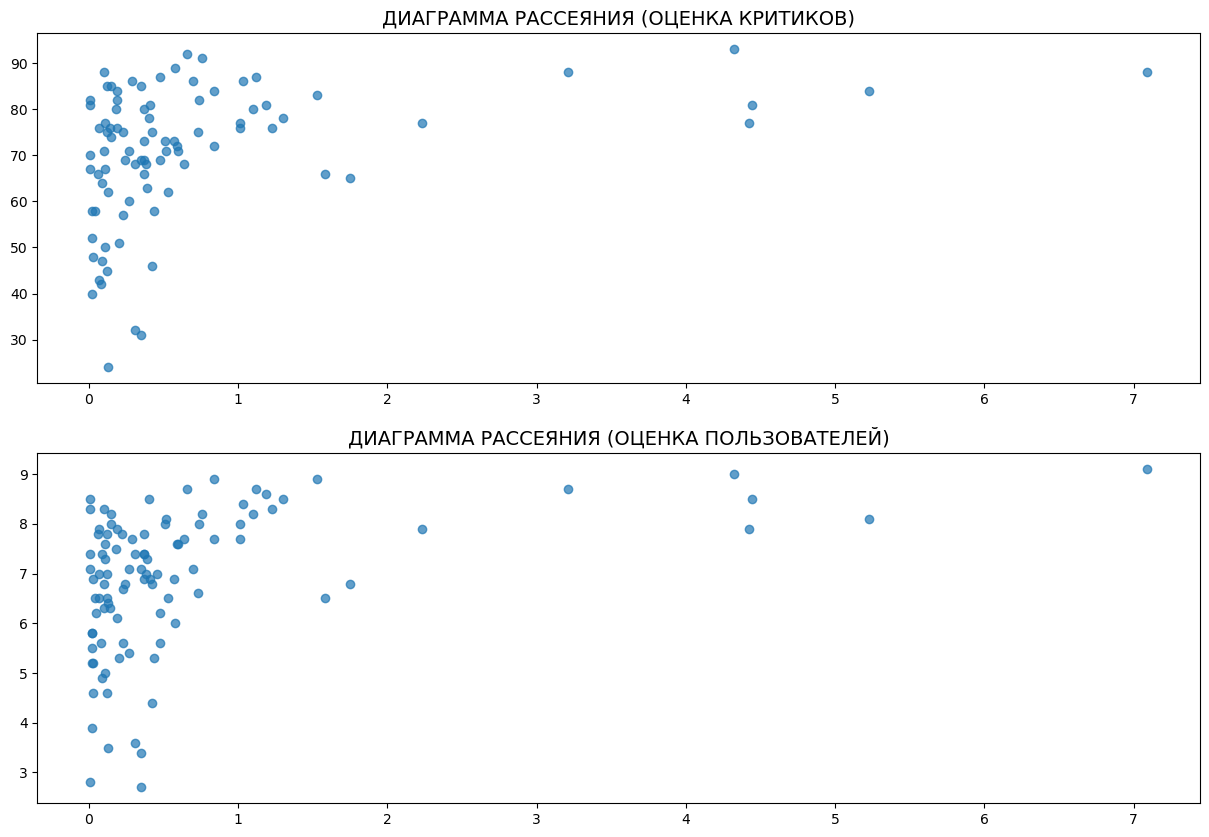

Коэффициент корреляция между оценками критиков и продажами: 0.348379760120175
Коэффициент корреляция между между оценками пользователей и продажами: 0.4002190202148619

****************************************************************************************************
Платформа: Wii
Для платформы мало данных для расчета

****************************************************************************************************
Платформа: PC


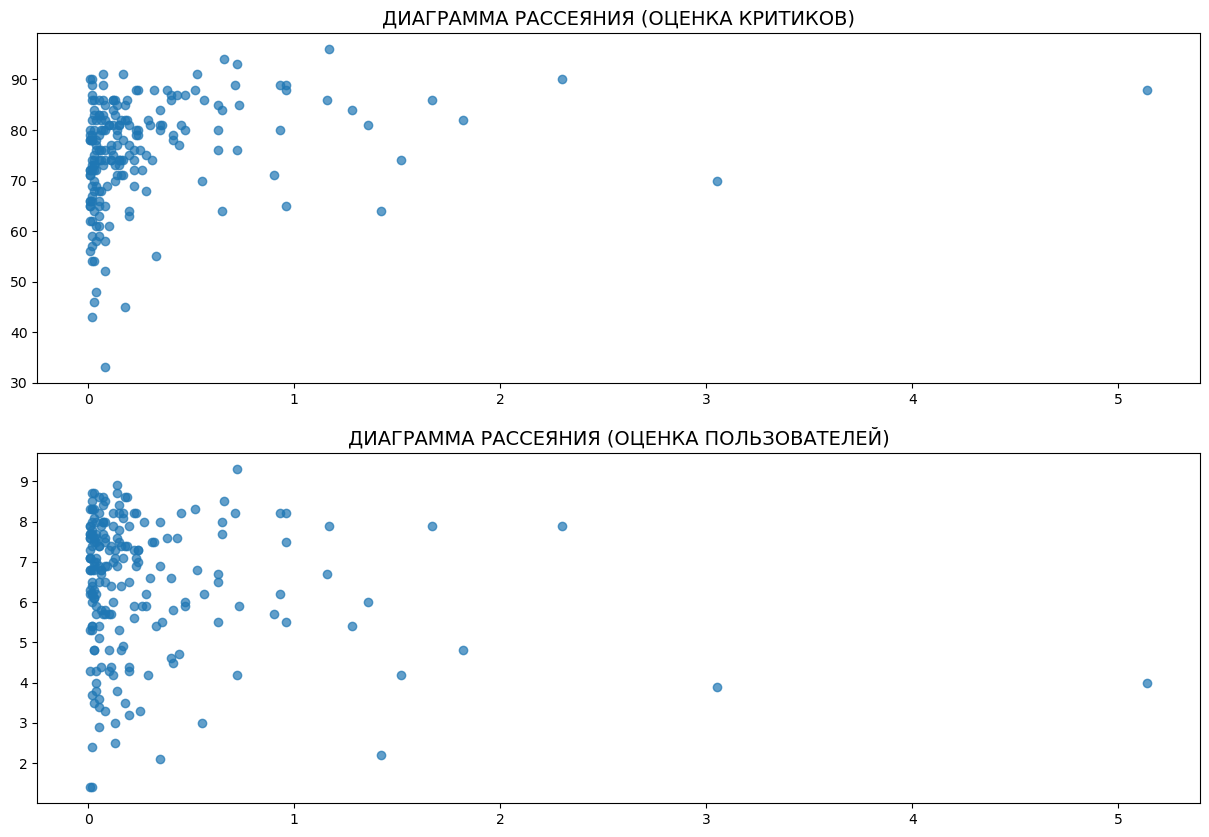

Коэффициент корреляция между оценками критиков и продажами: 0.23724324311567907
Коэффициент корреляция между между оценками пользователей и продажами: -0.12186747630735571

****************************************************************************************************
Платформа: PSV


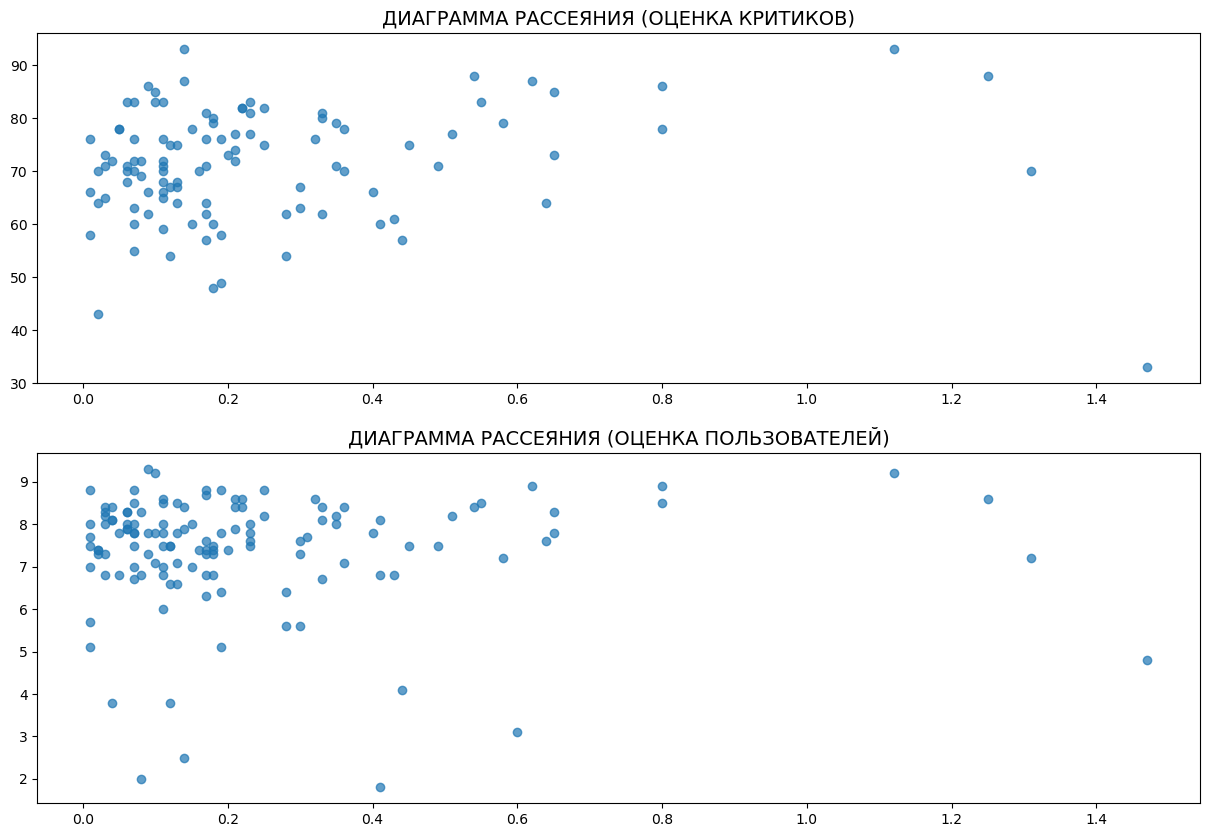

Коэффициент корреляция между оценками критиков и продажами: 0.0944878992931617
Коэффициент корреляция между между оценками пользователей и продажами: -0.004339437514314884

****************************************************************************************************
Платформа: PSP
Для платформы мало данных для расчета

----------------------------------------------------------------------------------------------------
Средний коэффициент корреляции стоимости и оценки критиков: 0.3149006560671246
Средний коэффициент корреляции стоимости и оценки критиков: 0.04633384849704856


In [60]:
# для сокращения времени на анализ напишем
# функцию для подсчета коэффициентов корреляции и построения диаграмм рассеяния для каждой платформы 

# для подсчета средних значений корреляции создадим списки для значений
corr_critics = []
corr_users = []

# для каждой платформы из датафрейма data
for i in data.platform.unique():
    try:
        # делаем из датафрейма срез данных платформы
        slice = data.loc[data['platform'] == i]
        
        print('*' * 100)
        print('Платформа:', i)
        
        # проверка достаточности данных для расчета
        if slice.critic_score.count() > 10:
            
            # расчет коэффициентов корреляции 
            corr_critics_score = slice.total_sales.corr(slice.critic_score)
            corr_critics.append(corr_critics_score)
            corr_users_score = slice.total_sales.corr(slice.user_score)
            corr_users.append(corr_users_score)
            
            # построение графиков корреляции
            fig, ax = plt.subplots(2, figsize=(15,10))
            ax[0].scatter(x = slice.total_sales, y = slice.critic_score, alpha=0.7);
            ax[0].set_title('ДИАГРАММА РАССЕЯНИЯ (ОЦЕНКА КРИТИКОВ)', fontsize = 14, color = 'black');
            ax[1].scatter(x = slice.total_sales, y = slice.user_score, alpha=0.7);
            ax[1].set_title('ДИАГРАММА РАССЕЯНИЯ (ОЦЕНКА ПОЛЬЗОВАТЕЛЕЙ)', fontsize = 14, color = 'black');
            plt.show()
         
            print('Коэффициент корреляция между оценками критиков и продажами:', corr_critics_score)
            print('Коэффициент корреляция между между оценками пользователей и продажами:', corr_users_score)
        
        else:
            print('Для платформы мало данных для расчета')
        
        print()
        
    except:
        print('Что-то пошло не так')
        

# выводим средние значения коэффициента корреляции для всех платформ, учавствоваших в расчете
print('-' * 100)
print('Средний коэффициент корреляции стоимости и оценки критиков:', sum(corr_critics) / len(corr_critics))
print('Средний коэффициент корреляции стоимости и оценки критиков:', sum(corr_users) / len(corr_users))

За актуальный период получили:
- средний коэффициент корреляции стоимости и оценки критиков 0,31 - ниже среденей
- средний коэффициент корреляции стоимости и оценки пользователей 0,04 - нету корреляции

#### Промежуточный вывод

По данным проведенного анализа можно утверждать, что есть небольшая зависимость между продажами и оценками критиков. Зависимость между продажами и отзывами пользователей отсутствует. Данные подтверждены для различных платформ и на различных временных периодах.

### Продажи по жанрам

Оценим количество выпускаемых игр и продажи в разрезе по жанрам

In [61]:
# для исключения многократного включения в расчет одинаковых проектов, выпущенных для разных платформ, сведем данные по названию проекта
# просуммируем продажи и сюда же добавим информацию о жанре

temp = data.copy()
temp = temp.groupby('name', as_index=False).agg({'total_sales' : 'sum', 'genre' : 'first'})
temp

,name,total_sales,genre
0,Beyblade Burst,0.03,Role-Playing
1,Fire Emblem Fates,1.67,Role-Playing
2,Frozen: Olaf's Quest,1.10,Platform
3,Haikyu!! Cross Team Match!,0.04,Adventure
4,Tales of Xillia 2,0.84,Role-Playing
...,...,...,...
1666,Zumba Fitness: World Party,0.47,Misc
1667,Zyuden Sentai Kyoryuger: Game de Gaburincho!!,0.05,Action
1668,[Prototype 2],1.64,Action
1669,htoL#NiQ: The Firefly Diary,0.01,Platform


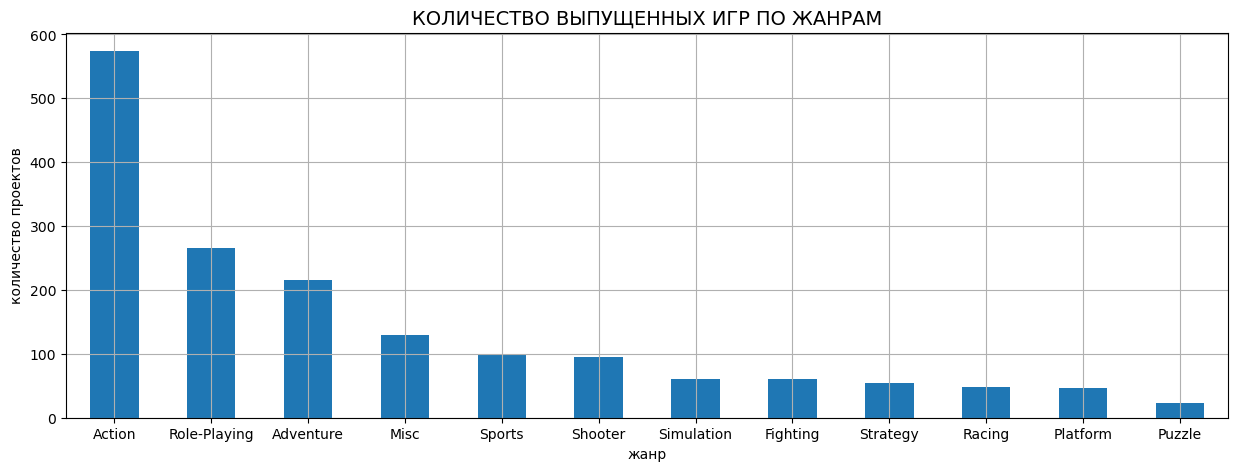

In [62]:
# график количества выпущенных игр в разрезе жанра

(
    temp
    .genre
    .value_counts()
    .plot(
        kind='bar',
        figsize=(15, 5),
        grid=True,
        legend=False
    )
)

plt.title('КОЛИЧЕСТВО ВЫПУЩЕННЫХ ИГР ПО ЖАНРАМ', fontsize = 14, color = 'black')
plt.xlabel('жанр', fontsize = 10, color = 'black')
plt.ylabel('количество проектов', fontsize = 10, color = 'black')
plt.xticks(rotation=0)
plt.show()

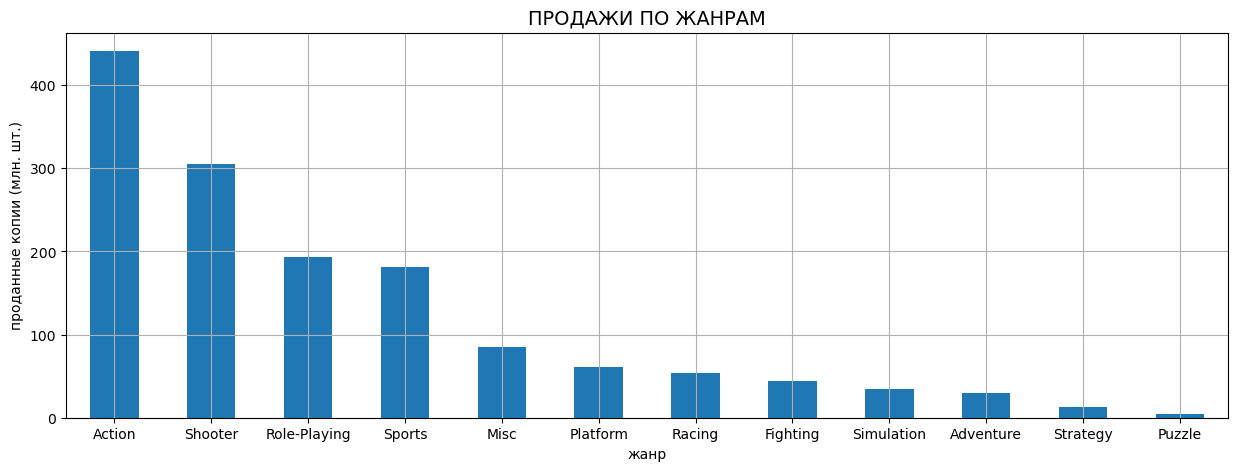

In [63]:
# график продаж в разрезе жанра

(
    temp
    .groupby('genre')
    .total_sales
    .sum()
    .sort_values(ascending=False)
    .plot(
        kind='bar',
        figsize=(15, 5),
        grid=True,
        legend=False
    )
)

plt.title('ПРОДАЖИ ПО ЖАНРАМ', fontsize = 14, color = 'black')
plt.xlabel('жанр', fontsize = 10, color = 'black')
plt.ylabel('проданные копии (млн. шт.)', fontsize = 10, color = 'black')
plt.xticks(rotation=0)
plt.show()

Для более точного анализа оценим продажи в разрезе жанров при помощи графика "ящик с усами"

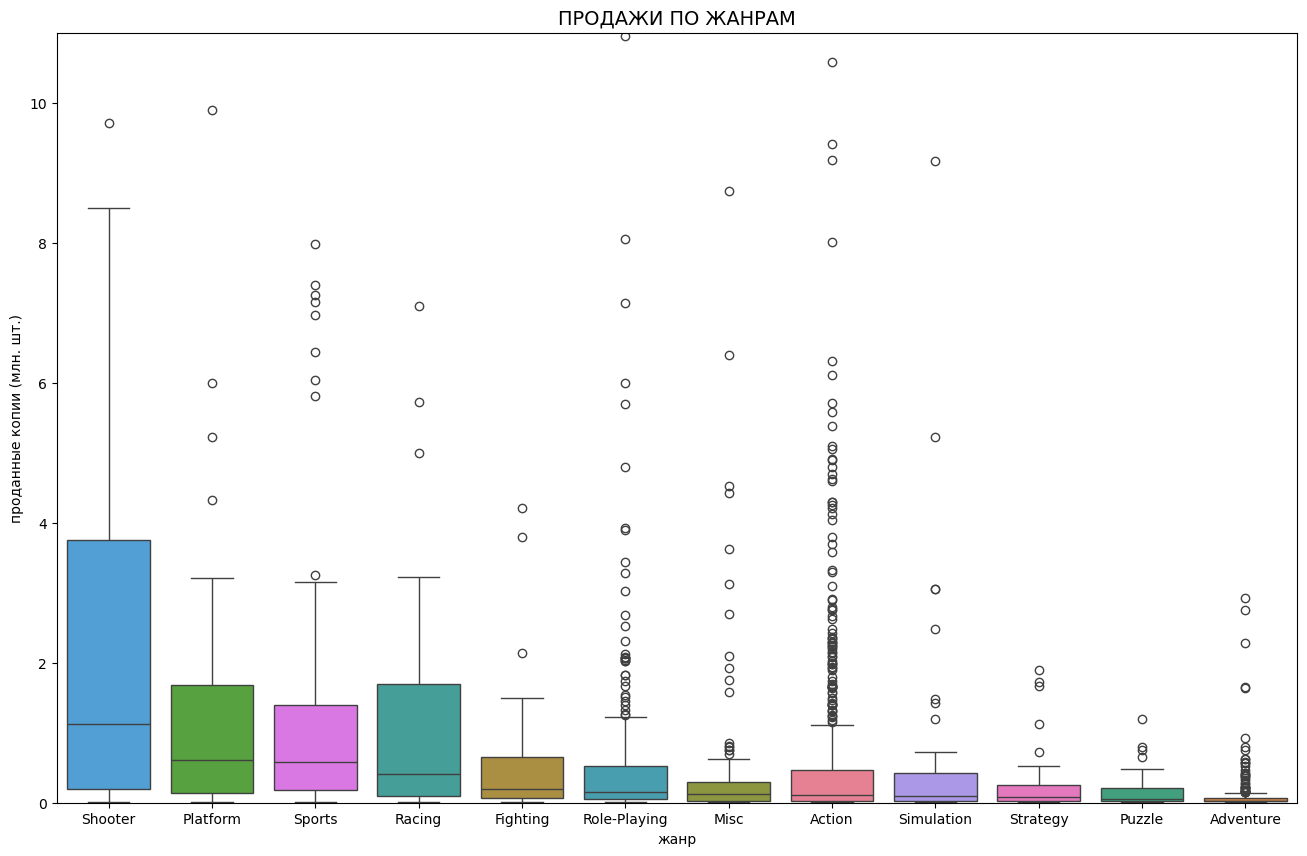

In [64]:
# создадим список платформ для сортировки по медиане
order = temp.groupby('genre').total_sales.median().sort_values(ascending=False).index

# при помощи сводной таблицы выберем данные для построения графика
sales_genres = (
    data
    .pivot_table(
        index='name',
        columns='genre',
        values='total_sales',
        aggfunc='sum'
    )
)

# строим график
plt.subplots(figsize=(16, 10))
sns.boxplot(data=sales_genres, order=order)

plt.title('ПРОДАЖИ ПО ЖАНРАМ', fontsize = 14, color = 'black')
plt.xlabel('жанр', fontsize = 10, color = 'black')
plt.ylabel('проданные копии (млн. шт.)', fontsize = 10, color = 'black')
plt.ylim([0, 11])
plt.show()

По графикам можно увидеть топ-3 жанров по продажам:

1. Action.
2. Shooter.
3. Role-Playing.

Жанры с самыми стабильными продажами:

1. Shooter
2. Platform
3. Sports

Найдем топ-5 игр в этих жанрах

In [65]:
(
    data
    .query('genre=="Shooter"')
    .groupby(['genre', 'name'])['total_sales'].sum()
    .sort_values(ascending=False)
    .head(5)
)

genre    name                          
Shooter  Call of Duty: Black Ops II        29.40
         Call of Duty: Ghosts              27.39
         Call of Duty: Black Ops 3         25.67
         Call of Duty: Advanced Warfare    21.97
         Battlefield 4                     13.94
Name: total_sales, dtype: float64

In [66]:
(
    data
    .query('genre=="Platform"')
    .groupby(['genre', 'name'])['total_sales'].sum()
    .sort_values(ascending=False)
    .head(5)
)

genre     name                   
Platform  New Super Mario Bros. 2    9.90
          Skylanders SWAP Force      6.00
          New Super Mario Bros. U    5.23
          Super Mario 3D World       4.32
          Super Mario Maker          3.21
Name: total_sales, dtype: float64

In [67]:
(
    data
    .query('genre=="Sports"')
    .groupby(['genre', 'name'])['total_sales'].sum()
    .sort_values(ascending=False)
    .head(5)
)

genre   name    
Sports  FIFA 15     17.37
        FIFA 14     16.46
        FIFA 16     16.30
        FIFA 17     11.48
        NBA 2K16     7.98
Name: total_sales, dtype: float64

Дополнительно найдем топ-5 игр для двух оставшихся жанров с самыми большими продажами

In [68]:
(
    data
    .query('genre=="Action"')
    .groupby(['genre', 'name'])['total_sales'].sum()
    .sort_values(ascending=False)
    .head(5)
)

genre   name                           
Action  Grand Theft Auto V                 56.58
        FIFA Soccer 13                     15.97
        Assassin's Creed IV: Black Flag    13.06
        Assassin's Creed III               13.01
        The Last of Us                     10.58
Name: total_sales, dtype: float64

In [69]:
(
    data
    .query('genre=="Role-Playing"')
    .groupby(['genre', 'name'])['total_sales'].sum()
    .sort_values(ascending=False)
    .head(5)
)

genre         name                                     
Role-Playing  Pokemon X/Pokemon Y                          14.60
              Fallout 4                                    12.67
              Pokemon Omega Ruby/Pokemon Alpha Sapphire    11.68
              Diablo III                                   10.95
              Pokemon Black 2/Pokemon White 2               8.06
Name: total_sales, dtype: float64

Примечательно что у игры FIFA Soccer 13 жанр Action а не Sports.

Также можно сделать вывод, что по количеству выпускаемых игр жанр Adventure находится на 3 месте, но по продажам на 10. Что говорит о том, что несмотря на выход большого количества проектов в этом жанре, они не интересны потребителю. А с играми жанра Shooter ситуация обратная.

Оценим продажи игр в разрезе жанров и платформ.

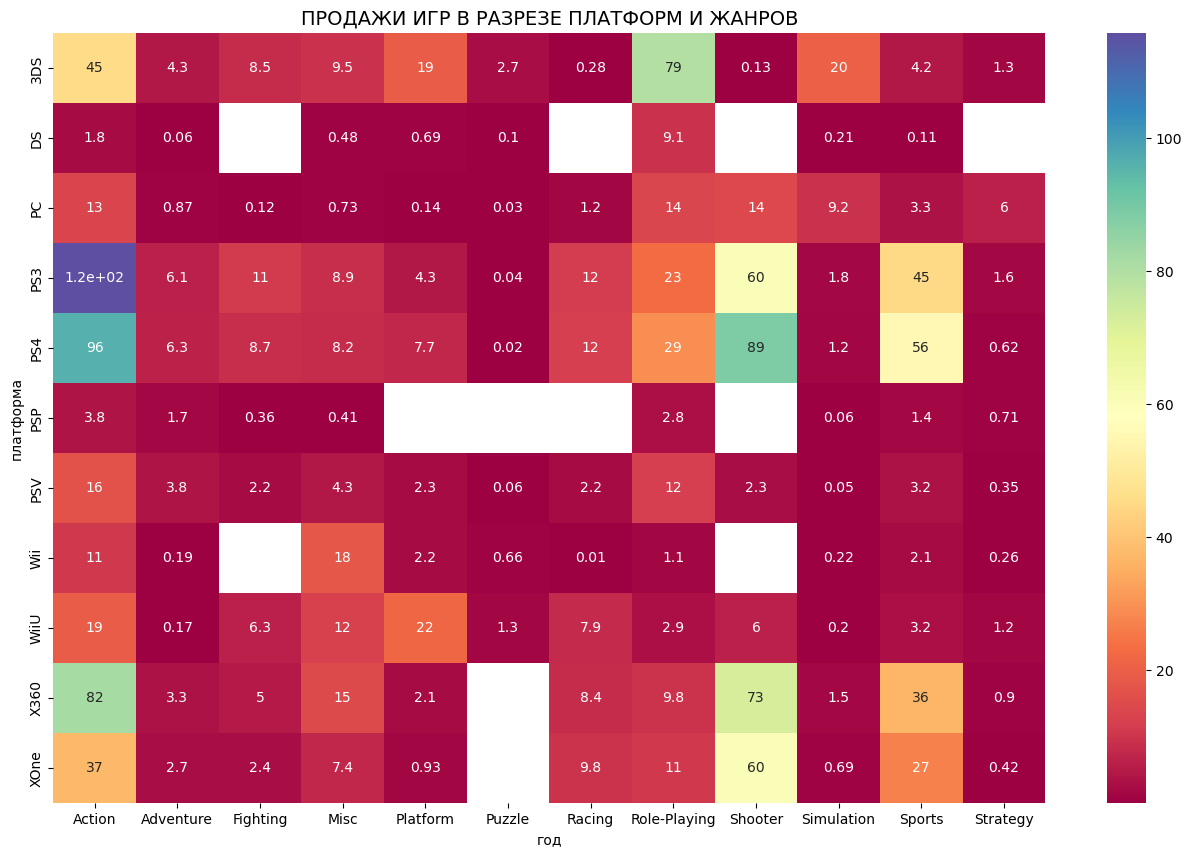

In [70]:
platforms_genre_sales = data.pivot_table(index='platform', columns='genre', values='total_sales', aggfunc='sum')

# зададим размер графика
plt.subplots(figsize=(16, 10))

# строим график и подписываем оси
sns.heatmap(platforms_genre_sales, annot= True, cmap='Spectral')
plt.title('ПРОДАЖИ ИГР В РАЗРЕЗЕ ПЛАТФОРМ И ЖАНРОВ', fontsize = 14, color = 'black')
plt.xlabel('год', fontsize = 10, color = 'black')
plt.ylabel('платформа', fontsize = 10, color = 'black')
plt.show()

Жанры с самыми большими продажами для каждой из актуальных платформ:

- PlayStation 4:
1. Action.
2. Shooter.
3. Soprts.

- XBox One:
1. Shooter.
2. Action.
3. Soprts.

- Nintendo 3DS:
1. Role-Playing.
2. Action.
3. Simulation.

Построим график продаж по жанрам за весь период и сравним как изменились предпочтения пользователей

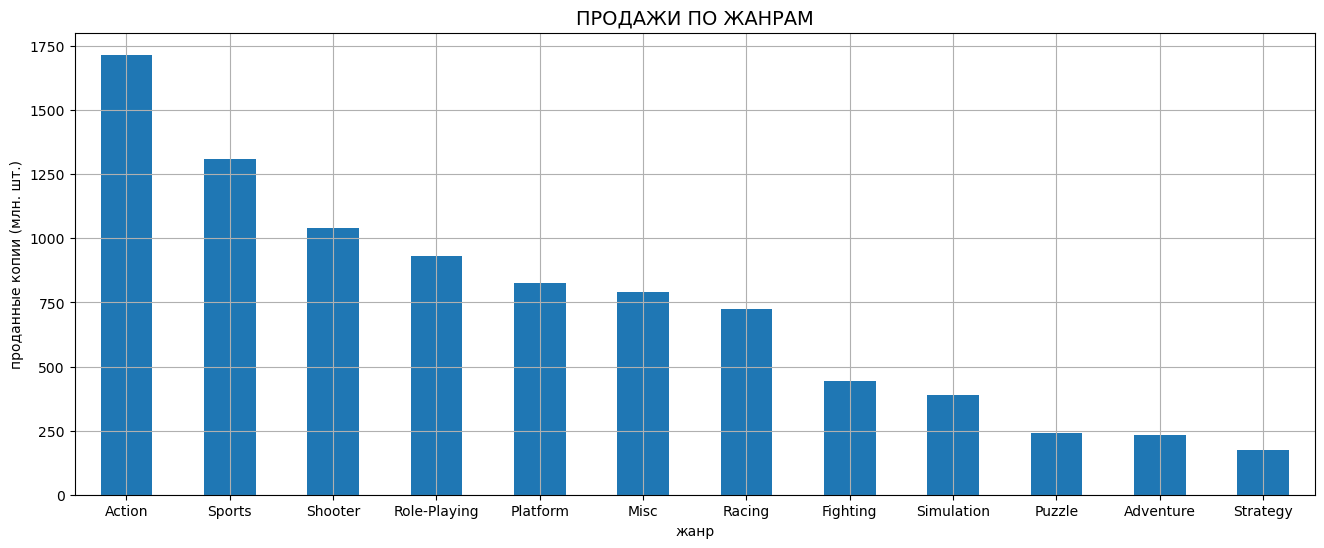

In [71]:
# построим график продаж по жанрам

(
    df
    .groupby('genre')
    .total_sales
    .sum()
    .sort_values(ascending=False)
    .plot(
        kind='bar',
        figsize=(16,6),
        grid=True,
        legend=False
    )
)

plt.title('ПРОДАЖИ ПО ЖАНРАМ', fontsize = 14, color = 'black')
plt.xlabel('жанр', fontsize = 10, color = 'black')
plt.ylabel('проданные копии (млн. шт.)', fontsize = 10, color = 'black')
plt.xticks(rotation=0)
plt.show()

В целом изменения незначительные. Со временем игры жанра Sports потеряли в популярности и опустились со второй строчки на 4. Я думаю, что отчасти это связано не со снижением качества игр жанра Sports а с тем, что игры жанра Shooter с ростом производительности консолей значительно выросли в качестве, а играм в жанре Role-Playing, возможно, помогаю продажи платформы Nintendo 3DS (где этот жанр в абсолютном лидерстве) в каких-то определенных регионах. Позже проверим это предположение.

#### Промежуточный вывод

За актуальный период жанры с самыми стабильными продажами:

1. Shooter
2. Platform
3. Sports

За актуальный период жанры с самыми высокими продажами:

1. Action.
2. Shooter.
3. Role-Playing.

Топ-3 жанров по перпективным платформам:

- PlayStation 4:
1. Action.
2. Shooter.
3. Sports.

- XBox One:
1. Shooter.
2. Action.
3. Sports.

- Nintendo 3DS:
1. Role-Playing.
2. Action.
3. Simulation.


### Вывод



По имеющимся данным в истории игрового рынке можно выделить 4 периода:

1. До 1994 года. На рынке доминировали простые консоли. Количесвто выпускаемых проектов до 100 в год
2. 1994-2008. С выпуском более мощных консолей и повышением качества игр продажи значительно росли до пика в 2008 году.
3. 2009-2011. С развитием мобильных игр, сервисов электронной дистрибуции игр и ростом скорости интрнет-соединения к 2012 году продажи снизились до уровня 2003 года.
4. С 2012 года уровень продаж остается стабильным без сильных всплесков.

Основываясь на данных о продажах игр по годам, а также данных о продолжительности жизненного цикла платформ определен для дальнейшего анализа актуальный период с 2012.

Определены самые выгодные с коммерческой точки зрения платформы:

1. PlayStation 4. Актуальная платформа с растущими продажами и увеличивающимся количеством выпускаемых игровых проектов.
2. Microsoft XBox One. Актуальная платформа. Имеет высокие продажи и увеличивающееся количество выпускаемых проектов.
3. Nintendo 3DS. Платформа на 3 месте по продажам. Одна из самых свежих платформ вместе с PlayStation V.

Эти платформы только начали свой жизненный цикл и имеют большой потенциал роста. Также рекомендуется обратить внимание на следующие платформы:

1. PlayStation Vita. Новая платформа. Не лидер по продажам, но имеет большой потенциал за счет большого количества выпускаемых проектов.
2. Nintendo WiiU. Актуальная платформа. На данный момент не лидер по продажам, но имеет большой потенциал.
3. PC. Небольшие но стабильные продажи на протяжении многих лет. Показывает рост продаж в последние годы.
4. PlayStation 3 и Microsoft XBox 360. Уже устаревающие платформы. Но еще имеющие некоторый потенциал роста

Определены игры с высокими продажами для каждой платформы:

- PlayStation 4:
1. Call of Duty: Black Ops 3.
2. Grand Theft Auto V.
3. FIFA 16.

- XBox One:
1. Call of Duty: Black Ops 3.
2. Grand Theft Auto V.
3. Call of Duty: Advanced Warfare.

- Nintendo 3DS:
1. Pokemon X/Pokemon Y.
2. Pokemon Omega Ruby/Pokemon Alpha Sapphire.
3. New Super Mario Bros. 2.

Жанры с самыми стабильными продажами:

1. Shooter.
2. Platform.
3. Sports.

Топ-3 жанров с самыми высокими продажами по перпективным платформам:

- PlayStation 4:
1. Action.
2. Shooter.
3. Sports.

- XBox One:
1. Shooter.
2. Action.
3. Sports.

- Nintendo 3DS:
1. Role-Playing.
2. Action.
3. Simulation.

Также было установлено, что есть небольшая зависимость между продажами и оценками критиков. Зависимость между продажами и отзывами пользователей отсутствует. Данные подтверждены для различных платформ и на различных временных периодах.

## Анализ регионов

### Платформы по регионам

Посмотрим на продажи по платформам для каждого региона

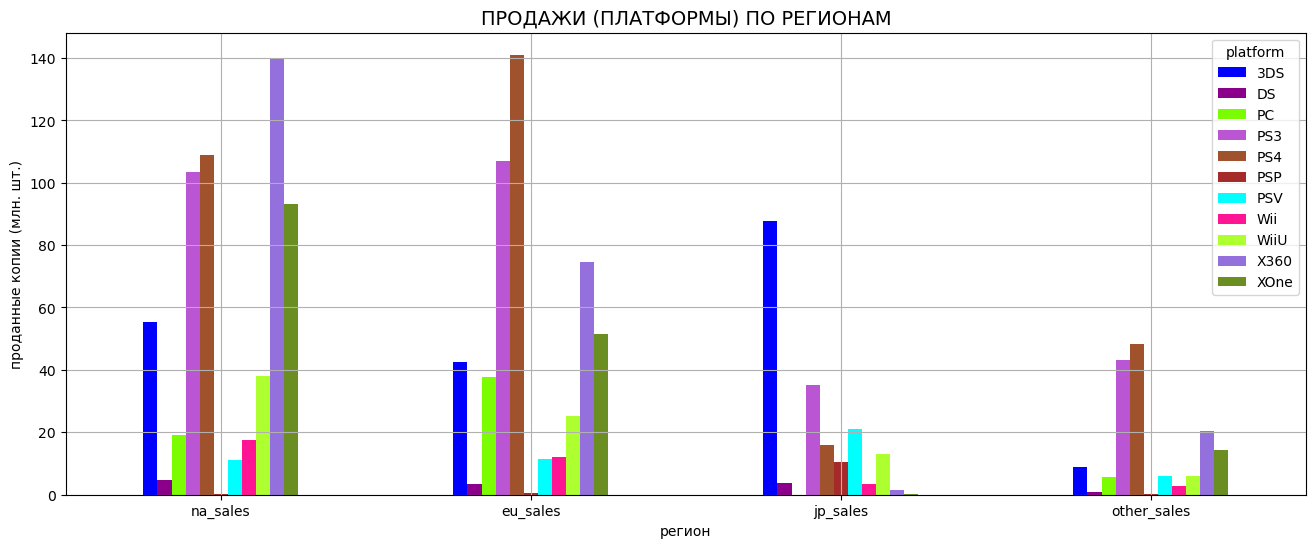

In [72]:
(
    (
        data
        .groupby('platform')
        .agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum', 'other_sales':'sum'})
    )    
    .T
    .plot(
        kind='bar',
        figsize=(16,6),
        grid=True,
        legend=True,
        color=['#0000FF', '#8B008B', '#7CFC00', '#BA55D3', '#A0522D', '#A52A2A', '#00FFFF', '#FF1493', '#ADFF2F', '#9370DB', '#6B8E23']
    )
)

plt.title('ПРОДАЖИ (ПЛАТФОРМЫ) ПО РЕГИОНАМ', fontsize = 14, color = 'black')
plt.xlabel('регион', fontsize = 10, color = 'black')
plt.ylabel('проданные копии (млн. шт.)', fontsize = 10, color = 'black')
plt.xticks(rotation=0)
plt.show()

Найдем топ-5 платформ для каждого региона

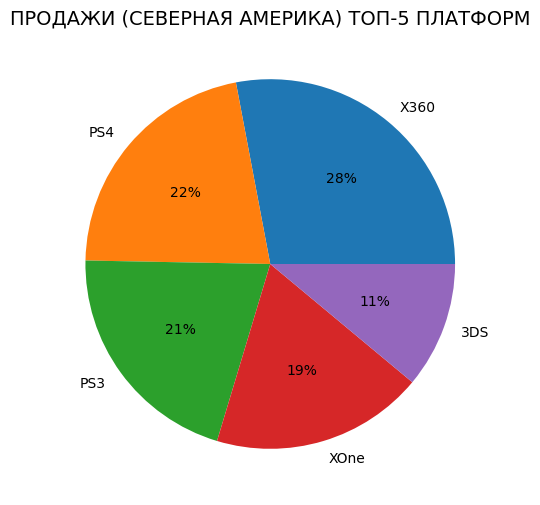

In [73]:
# сгруппируем данные по платформам и выберем для построения столбец с нужным регионом

(
    (
        data
        .groupby('platform')
        .agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum', 'other_sales':'sum'})
    )
    .na_sales
    .sort_values(ascending=False)
    .head(5)
    .plot(
        kind='pie',
        figsize=(16,6),
        grid=True,
        legend=False,
        autopct='%1.0f%%'
    )
)

plt.title('ПРОДАЖИ (СЕВЕРНАЯ АМЕРИКА) ТОП-5 ПЛАТФОРМ', fontsize = 14, color = 'black')
plt.xlabel('')
plt.ylabel('')
plt.show()

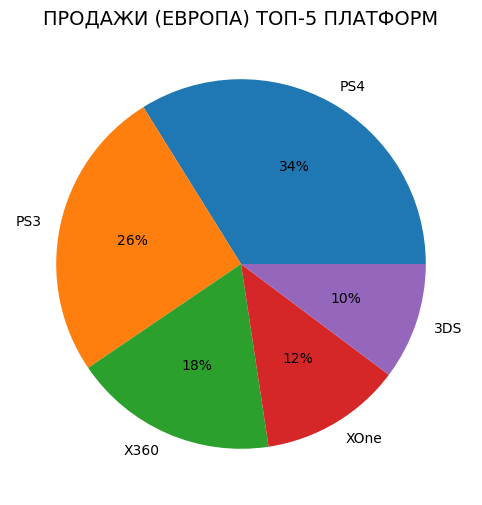

In [74]:
(
    (
        data
        .groupby('platform')
        .agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum', 'other_sales':'sum'})
    )
    .eu_sales
    .sort_values(ascending=False)
    .head(5)
    .plot(
        kind='pie',
        figsize=(16,6),
        grid=True,
        legend=False,
        autopct='%1.0f%%'
    )
)

plt.title('ПРОДАЖИ (ЕВРОПА) ТОП-5 ПЛАТФОРМ', fontsize = 14, color = 'black')
plt.xlabel('')
plt.ylabel('')
plt.show()

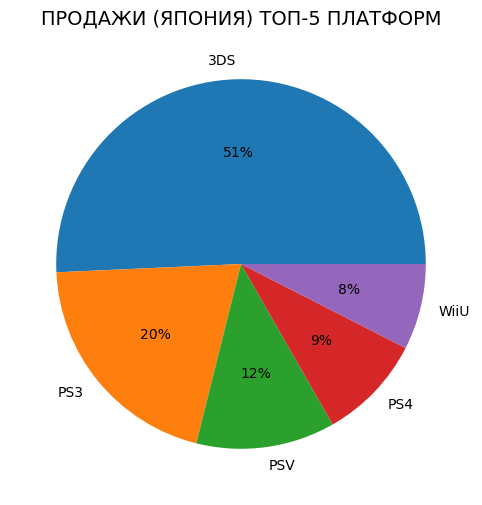

In [75]:
(
    (
        data
        .groupby('platform')
        .agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum', 'other_sales':'sum'})
    )
    .jp_sales
    .sort_values(ascending=False)
    .head(5)
    .plot(
        kind='pie',
        figsize=(16,6),
        grid=True,
        legend=False,
        autopct='%1.0f%%'
    )
)

plt.title('ПРОДАЖИ (ЯПОНИЯ) ТОП-5 ПЛАТФОРМ', fontsize = 14, color = 'black')
plt.xlabel('')
plt.ylabel('')
plt.show()

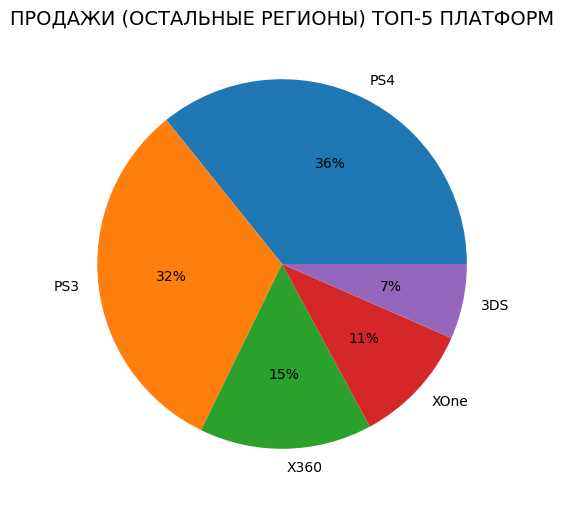

In [76]:
(
    (
        data
        .groupby('platform')
        .agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum', 'other_sales':'sum'})
    )
    .other_sales
    .sort_values(ascending=False)
    .head(5)
    .plot(
        kind='pie',
        figsize=(16,6),
        grid=True,
        legend=False,
        autopct='%1.0f%%'
    )
)

plt.title('ПРОДАЖИ (ОСТАЛЬНЫЕ РЕГИОНЫ) ТОП-5 ПЛАТФОРМ', fontsize = 14, color = 'black')
plt.xlabel('')
plt.ylabel('')
plt.show()

Посмотрим на распределение продаж игр на платформах PS4, XOne и 3DS по регионам.

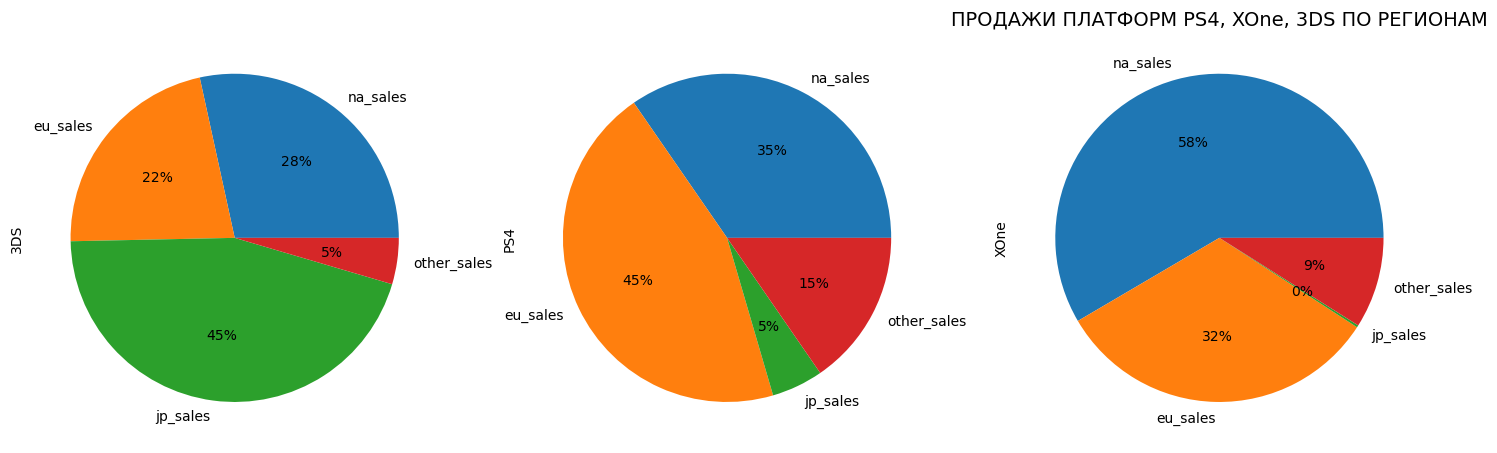

In [77]:
(
    data
    .query('platform==["PS4", "XOne", "3DS"]')
    .groupby('platform')
    .agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum', 'other_sales':'sum'})
    .T
    .plot(
     kind='pie',
        figsize=(18,18),
        autopct='%1.0f%%',
        subplots=True,
        legend=False
    )
)

plt.title('ПРОДАЖИ ПЛАТФОРМ PS4, XOne, 3DS ПО РЕГИОНАМ', fontsize = 14, color = 'black')
plt.show()

#### Промежуточный вывод

В Северной Америке по продажам первое место занимают игры для платформы XBox 360, далее идут две платформы Sony: PS4 и PS3. На четвертом месте консоль Microsoft XBox One. Замыкает топ-5 портативная консоль Nintendo 3DS.

В Европе и прочих регионах распределение немного другое. Первых два места занимают платформы Sony: PS4 и PS3. Далее две платформы Microsoft: XBox 360 и XBox One. Последнее место у портативной консоли Nintendo 3DS.

Самые заметные различия в продаж в регионе Япония. В этом регионе очень популярны портативные игры: первое и третье места заниют Nintendo 3DS и PlayStation Vita соответственно. На втором и четвертом платформы Sony: PS3 и PS4 соответственно. На пятом месте Nintendo WiiU. Продажи на платформе Nintendo 3DS лидируют с большим отрывом: обгоняют продажи на платформе PS3 (второе место) более чем в 2 раза.

Необходимо отметить, что по продажам в Японии платформы Microsoft не попадают в топ-5. 
Также можно подтвердить предположение о том, что продажи платформы Nintendo 3DS в Японии помогли жанру Role-Playing попасть в топ-3 жанров.

Продажи выбранных платформ по регионам:

PlayStation 4: Европа - 45%, Северная америка - 35%.
Microsoft XBox One: Северная америка - 58%, Европа - 32%.
Nintendo 3DS: Япония - 45%, Северная америка - 28%.

### Жанры по регионам

Посмотрим на самые популярные жанры по регионам.

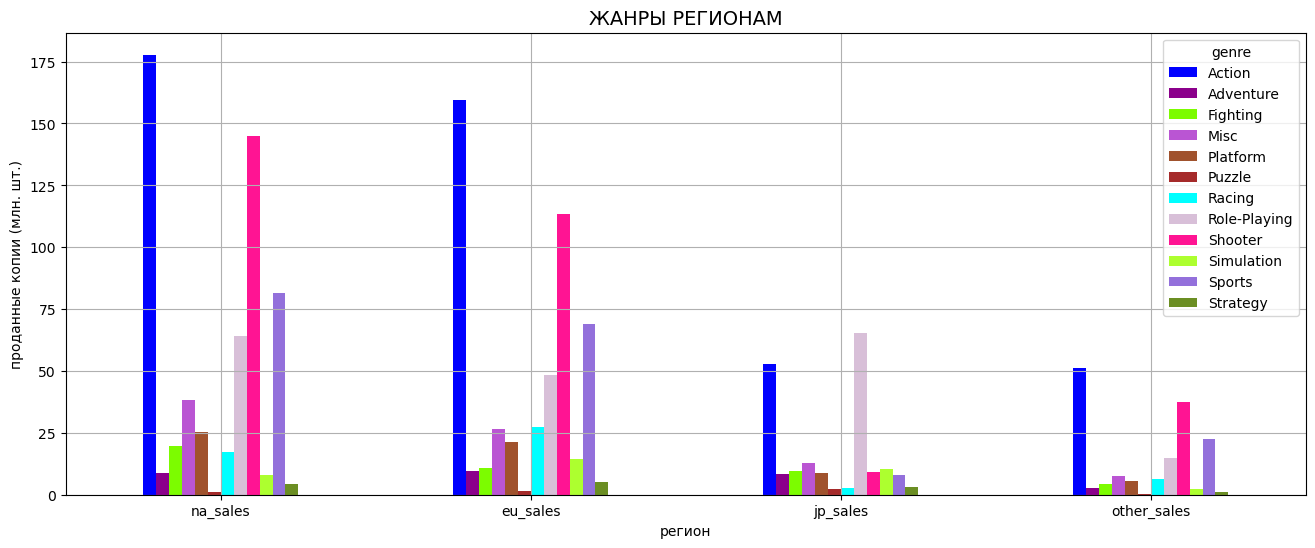

In [78]:
(
    (
        data
        .groupby('genre')
        .agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum', 'other_sales':'sum'})
    )    
    .T
    .plot(
        kind='bar',
        figsize=(16,6),
        grid=True,
        legend=True,
        color=['#0000FF', '#8B008B', '#7CFC00', '#BA55D3', '#A0522D', '#A52A2A', '#00FFFF', '#D8BFD8', '#FF1493', '#ADFF2F', '#9370DB', '#6B8E23']
    )
);

plt.title('ЖАНРЫ РЕГИОНАМ', fontsize = 14, color = 'black')
plt.xlabel('регион', fontsize = 10, color = 'black')
plt.ylabel('проданные копии (млн. шт.)', fontsize = 10, color = 'black')
plt.xticks(rotation=0)
plt.show()

Определим Топ-5 популярных жанров для каждого региона и их долю

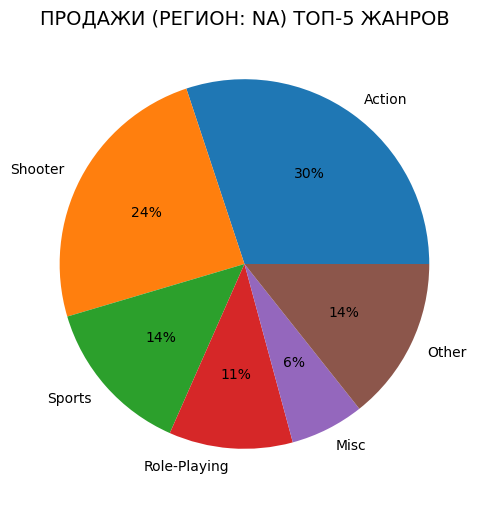

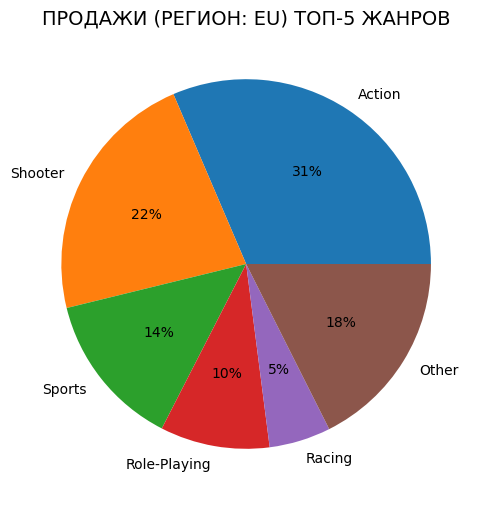

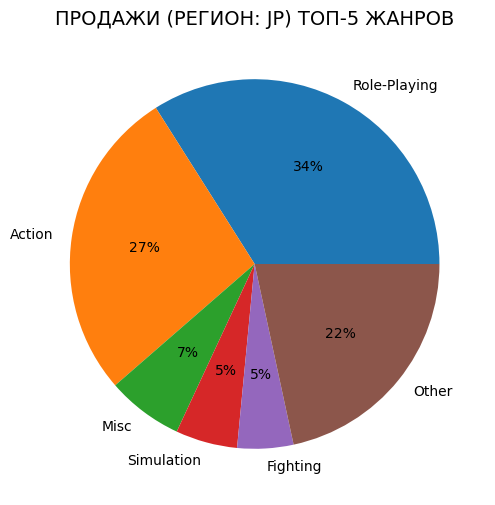

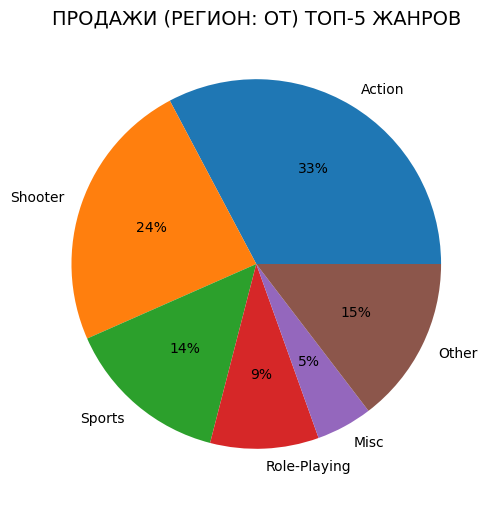

In [79]:
# данные и целевой столбец
temp, target = data.copy(), 'genre'

# список регионов
list_region = temp.columns[4:8]

# при помощи цикла построим графики продаж по регионам для Топ-5 жанров (плюс прочие)
for i in range(4):

    # группируем данные по жанру, суммируем продажи по региону и выбираем Топ-5 жанров
    temp_ = (
        temp
        .groupby(target)[list_region[i]].sum()
        .reset_index()
        .sort_values(by=list_region[i], ascending=False)[:5]
    )

    # добавим строку "прочие" с остальными продажами
    other = pd.DataFrame({
    'genre': ['Other'],
    list_region[i]: temp[list_region[i]].sum() - temp_[list_region[i]].sum()})
    temp_ = pd.concat([temp_, other], ignore_index=True)

    # перенесем названия жанров в индексы
    temp_.index =temp_[target]
    temp_.drop(target, axis= 1 , inplace= True )

    # строим график
    temp_.plot(
        y=list_region[i],
        kind='pie',
        figsize=(16,6),
        grid=True,
        legend=False,
        autopct='%1.0f%%'
    )

    plt.title(f'ПРОДАЖИ (РЕГИОН: {list_region[i][:2].upper()}) ТОП-5 ЖАНРОВ', fontsize = 14, color = 'black')
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

#### Промежуточный вывод

Топ-5 популярных жанров для региона Северная Америка:
1. Action
2. Shooter
3. Sports
4. Role-Playing
5. Misc

Топ-5 популярных жанров для региона Европа:
1. Action
2. Shooter
3. Sports
4. Role-Playing
5. Racing

Топ-5 популярных жанров для региона Япония:
1. Role-Playing
2. Action
3. Misc
4. Simulation
5. Fighting

Топ-5 популярных жанров для остальных регионов:
1. Action
2. Shooter
3. Sports
4. Role-Playing
5. Misc

### Влияние рейтинга ESRB на продажи по регионам

Оценим продажи игр по регионам в разрезе их рейтинга

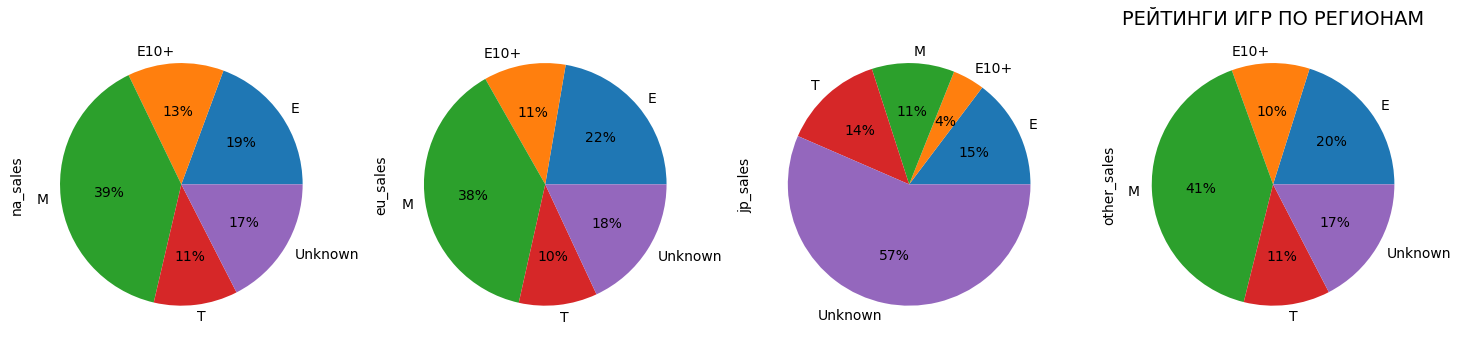

In [80]:
(
    (
        data
        .groupby('rating')
        .agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum', 'other_sales':'sum'})
    )   
    .plot(
        kind='pie',
        figsize=(18,18),
        grid=True,
        legend=False,
        autopct='%1.0f%%',
        subplots=True
    )
)

plt.title('РЕЙТИНГИ ИГР ПО РЕГИОНАМ', fontsize = 14, color = 'black')
plt.show()

#### Промежуточный вывод

По графику видно, что для регионов Северная Америка, Европа и прочих регионов возрастной рейтинг влияет на продажи. Для региона Япония самые высокие продажи у игр с неустановленным возрастным рейтингом. Рейтинг ESRB предназначен для маркировки игр, выпущенных в США и Канаде, и для других регионов он не заполняется. В Японии есть свой рейтинг, но по нему в датасете нет данных. То есть, в данном случае, скорее всего пропуск имеет признак, что игра выпущена не в Северо-Американском регионе.

### Вывод

Топ-5 платформ в регионе Севернгая Америка:
1. XBox 360
2. PlayStation 4
3. PlayStation 3
4. XBox One
5. Nintendo 3DS

Топ-5 платформ в регионе Европа:
1. PlayStation 4
2. PlayStation 3
3. XBox 360
4. XBox One
5. Nintendo 3DS

Топ-5 платформ в регионе Япония:
1. Nintendo 3DS
2. PlayStation 3
3. PlayStation Vita
4. PlayStation 4
5. Nintendo WiiU

Топ-5 платформ в остальных регионах:
1. PlayStation 4
2. PlayStation 3
3. XBox 360
4. XBox One
5. Nintendo 3DS

Необходимо обратить внимание на различия в предпочтениях у покупателей из региона Япония. В этом регионе популярны портативные консоли. Продажи на платформе Nintendo 3DS лидируют с большим отрывом: обгоняют продажи на платформе PS3 (второе место) более чем в 2 раза.

Топ-5 популярных жанров по регионам

Северная Америка: Action, Shooter, Sports, Role-Playing, Misc

Европа: Action, Shooter, Sports, Role-Playing, Racing

Япония: Role-Playing, Action, Misc, Simulation, Fighting

Остальные регионы: Action, Shooter, Sports, Role-Playing, Misc

Также небходимо отметить зависимость продаж от установленного возрастного рейтинга ESRB в регионах: Северная Америка, Европа и прочие регионы. 

Для региона Япония самые высокие продажи у игр с неустановленным возрастным рейтингом ESRB. Это можно объяснить тем, что рейтинг ESRB используется для Североамериканского рынка (США, Канада) и Мексики, поэтому игры, популярные на рынке Японии не имеют данного рейтинга. Аналог ESRB для Японии - CERO.

## Проверка гипотез

Правила формулирования нулевой и альтернативной гипотез:
- <i>Нулевая гипотеза (H0)</i> - это предположение о том, что нет различий между средними значениями двух выборок. В случае t-теста, нулевая гипотеза утверждает, что среднее значение разницы между двумя выборками равно нулю.<br>
- <i>Альтернативная гипотеза (H1)</i> - это противоположное предположение о том, что существуют различия между средними значениями двух выборок. В t-тесте альтернативная гипотеза утверждает, что среднее значение разницы между двумя выборками не равно нулю.</p>

Использование t-теста имеет определенные ограничения, которые необходимо учитывать при его применении:
- Нормальное распределение данных: t-тест предполагает, что данные имеют нормальное распределение. Если данные не соответствуют этому предположению, то результаты теста могут быть недостоверными. При выборках более 30 значений нормальность выборки не важна, с учетом того, что в реальных бизнес-процессах нормального распределения данных ни когда не бывает.
- Равномерное распределение данных в каждой группе: t-тест предназначен для сравнения средних значений двух независимых выборок. Поэтому важно, чтобы в каждой группе (выборке) было достаточное количество наблюдений и они были равномерно распределены.
- Независимость выборок: t-тест предполагает, что выборки, которые сравниваются, являются независимыми. Если наблюдения в одной выборке зависят от наблюдений в другой выборке (например, в случае последовательных временных точек), то необходимо использовать другие статистические методы.
- Достаточно большой размер выборки: для получения достоверных результатов t-теста необходимо, чтобы размер каждой выборки был достаточно большим. Минимальные требования к размеру выборки зависят от уровня значимости.
- Отсутствие выбросов: t-тест чувствителен к выбросам в данных, поэтому важно убедиться, что в данных нет экстремальных значений, которые могут исказить результаты.
- Однородность дисперсий: t-тест предполагает, что дисперсии (разбросы) данных в каждой выборке примерно одинаковы. Если это не так, то следует использовать параметр `equal_var` равным `False`.

### Пользовательские рейтинги платформ Xbox One и PC

Гипотеза из задания: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Гипотезы для проверки:

- Нулевая гипотеза - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Альтернативная гипотеза - средние пользовательские рейтинги платформ Xbox One и PC не одинаковые.

Подготовим выборки для проверки гипотез

In [81]:
# выборка 1 - оценки пользователей платформа Xbox One

test_1_xbox = data[data.platform == 'XOne'].user_score.dropna()
test_1_xbox.describe()

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

In [82]:
# выборка 2 - оценки пользователей платформа PC

test_1_pc = data[data.platform == 'PC'].user_score.dropna()
test_1_pc.describe()

count    206.000000
mean       6.428641
std        1.664465
min        1.400000
25%        5.500000
50%        6.800000
75%        7.700000
max        9.300000
Name: user_score, dtype: float64

In [83]:
# зададим уровень статистической значимости 5%
# для проведения теста выбираем метод ttest_ind
# проводим двусторонний тест, параметр alternative оставляем по умолчанию
# выборки соразмерные, их дисперсии отличаются незначительно, параметр equal_var оставляем по умолчанию

alpha = 0.05

results = st.ttest_ind(test_1_xbox, test_1_pc)

print(f'Средняя оценка отзывова платформы XBox 360: {test_1_xbox.mean().round(2)}')
print(f'Средняя оценка отзывова платформы PC: {test_1_pc.mean().round(2)}')
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу') 

Средняя оценка отзывова платформы XBox 360: 6.52
Средняя оценка отзывова платформы PC: 6.43
p-значение: 0.5535080500643661
Нет оснований отвергнуть нулевую гипотезу


Результат проверки гипотезы: на имеющихся данных, на уровне значимости 5% нет оснований отвергать нулевую гипотезу о равенстве средних значений пользовательских рейтингов (отзывов) платформ Xbox One и PC в пользу альтернативной гипотезы

### Пользовательские рейтинги жанров Action и Sports

Гипотеза из задания: средние пользовательские рейтинги жанров Action и Sports разные.

Гипотезы для проверки:
- Нулевая гипотеза - средние пользовательские рейтинги жанров Action и Sports одинаковые.
- Альтернативная гипотеза - средние пользовательские рейтинги жанров Action и Sports не одинаковые.

Подготовим выборки для проверки гипотез

In [84]:
# выборка 1 - оценки пользователей жанр Action

test_2_action = data[data.genre == 'Action'].user_score.dropna()
test_2_action.describe()

count    523.000000
mean       6.825048
std        1.374440
min        1.600000
25%        6.250000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

In [85]:
# выборка 2 - оценки пользователей жанр Sports

test_2_sports = data[data.genre == 'Sports'].user_score.dropna()
test_2_sports.describe()

count    194.000000
mean       5.455670
std        1.743142
min        0.200000
25%        4.300000
50%        5.750000
75%        6.800000
max        8.800000
Name: user_score, dtype: float64

In [86]:
# зададим уровень статистической значимости 5%
# для проведения теста выбираем метод ttest_ind
# проводим двусторонний тест, параметр alternative оставляем по умолчанию
# выборки разных размеров, их дисперсии отличаются. параметру equal_var присваиваем значение False

alpha = 0.05

results_2 = st.ttest_ind(test_2_action, test_2_sports, equal_var=False)

print(f'Средняя оценка отзывова в жанре Action: {test_2_action.mean().round(2)}')
print(f'Средняя оценка отзывова в жанре Sports: {test_2_sports.mean().round(2)}')
print('p-значение:', results_2.pvalue)

if results_2.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу') 

Средняя оценка отзывова в жанре Action: 6.83
Средняя оценка отзывова в жанре Sports: 5.46
p-значение: 5.989458066467418e-20
Отвергаем нулевую гипотезу


Результат проверки гипотезы: на имеющихся данных, на уровне значимости 5% есть основания отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтингов (отзывов) жанров Action и Sports в пользу альтернативной гипотезы

### Вывод

Проверив гипотезы из задания были получены следующие результаты.

Гипотеза 1 подтверждена. Есть основания полагать что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Гипотеза 2 подтверждена. Есть основания полагать что средние пользовательские рейтинги жанров Action и Sports разные.

## Общий вывод

### Предобработка данных:

- Названия столбцов приведены к нижнему регистру.
- Пропуски в столбцах name, genre, rating заменены значениями unknown. Пропуски в столбце year_of_release заменены маркерным значением - 0. Значения tbd столбца user_score заменены на NaN. Пропуски в столбцах critic_score и user_score остались.
- В столбцах year_of_release и user_score был изменен тип данных.
- Найдено и удалено 2 дубликата.
- В таблицу добавлен столбец с сумарными продажами по 4 рынкам.

Наличие большого количества пропусков скорее всего обусловлено источником данных - открытые источники. Плюс база содержит данные за очень большой период, что вызывает сложности с наполнением базы.


### Анализ продаж:

Основываясь на данных о продажах игр по годам, а также данных о продолжительности жизненного цикла платформ определен для дальнейшего анализа актуальный период с 2012.

Топ-3 самых выгодных с коммерческой точки зрения платформ:

1. PlayStation 4. Актуальная платформа с растущими продажами и увеличивающимся количеством выпускаемых игровых проектов.
2. Microsoft XBox One. Актуальная платформа. Имеет высокие продажи и увеличивающееся количество выпускаемых проектов.
3. Nintendo 3DS. Платформа на 3 месте по продажам. Одна из самых свежих платформ вместе с PlayStation Vita.

Указанные платформы только начали свой жизненный цикл и имеют большой потенциал роста. Также рекомендуется обратить внимание на следующие платформы:

1. PlayStation Vita. Новая платформа. Не лидер по продажам, но имеет большой потенциал за счет большого количества выпускаемых проектов.
2. Nintendo WiiU. Актуальная платформа. На данный момент не лидер по продажам, но имеет большой потенциал на рынке Японии.
3. PC. Небольшие но стабильные продажи на протяжении многих лет. Показывает рост продаж в последние годы.
4. PlayStation 3 и Microsoft XBox 360. Уже устаревающие платформы. Но еще имеющие некоторый потенциал продаж

Игры с высокими продажами для каждой платформы из топ-3:

- PlayStation 4:
1. Call of Duty: Black Ops 3.
2. Grand Theft Auto V.
3. FIFA 16.

- XBox One:
1. Call of Duty: Black Ops 3.
2. Grand Theft Auto V.
3. Call of Duty: Advanced Warfare.

- Nintendo 3DS:
1. Pokemon X/Pokemon Y.
2. Pokemon Omega Ruby/Pokemon Alpha Sapphire.
3. New Super Mario Bros. 2.

Топ-3 популярных жанров для топ-3 платформ:

- PlayStation 4:
1. Action.
2. Shooter.
3. Soprts.

- XBox One:
1. Shooter.
2. Action.
3. Soprts.

- Nintendo 3DS:
1. Role-Playing.
2. Action.
3. Simulation.

Топ-3 жанров в период с 2012 года с точки зрения стабильных продаж:

1. Shooter.
2. Platform.
3. Sports.


### Анализ регионов:

- Топ-5 платформ в регионе Севернгая Америка:
1. XBox 360
2. PlayStation 4
3. PlayStation 3
4. XBox One
5. Nintendo 3DS

- Топ-5 платформ в регионе Европа:
1. PlayStation 4
2. PlayStation 3
3. XBox 360
4. XBox One
5. Nintendo 3DS

- Топ-5 платформ в регионе Япония:
1. Nintendo 3DS
2. PlayStation 3
3. PlayStation Vita
4. PlayStation 4
5. Nintendo WiiU

- Топ-5 платформ в остальных регионах:
1. PlayStation 4
2. PlayStation 3
3. XBox 360
4. XBox One
5. Nintendo 3DS

Необходимо обратить внимание на различия в предпочтениях у покупателей из региона Япония. В этом регионе популярны портативные консоли. Продажи на платформе Nintendo 3DS лидируют с большим отрывом: обгоняют продажи на платформе PS3 более чем в 2 раза.

Топ-5 популярных жанров по регионам

- Северная Америка:
1. Action
2. Shooter
3. Sports
4. Role-Playing
5. Misc

- Европа:
1. Action
2. Shooter
3. Sports
4. Role-Playing
5. Racing

- Япония:
1. Role-Playing,
2. Action
3. Misc
4. Simulation
5. Fighting

- Остальные регионы:
1. Action
2. Shooter
3. Sports
4. Role-Playing
5. Misc

Небходимо обратить внимание на зависимость продаж от установленного возрастного рейтинга ESRB в регионах: Северная Америка, Европа и прочие регионы. Рейтинг ESRB не актуален для Японии, зависимости продаж от указанного рейтинга для этого рынка нету

Кроме того было установлено, что есть крайне небольшая зависимость между продажами и оценками критиков. Зависимость между продажами и отзывами пользователей отсутствует.

### Проверка гипотез:

В результате проверки гипотез из задания были получены следующие результаты:

Гипотеза 1 подтверждена. Есть основания полагать что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Гипотеза 2 подтверждена. Есть основания полагать что средние пользовательские рейтинги жанров Action и Sports разные.



### Рекомендации:

При проведении маркетинговых кампаний следует принять во внимание следующее:

1. Самыми перспективными платформами выглядят PlayStation 4 и XBox One. Это самые актуальные платформы с увеличивающимся количеством выпускаемых проектов и растующими продажами.
2. Для PlayStation 4 лучший регион для продвижения - Европа, для XBox One - Северная Америка.
3. Игры на которые необходимо делать упор: Call of Duty: Black Ops 3 и Grand Theft Auto V. Данные проекты располагаются на первых строчках рейтинга продаж для данных платформ, также они относятся к самым популярным жанрам (Action и Shooter) в регионах продвижения платформ (Европа и Северная Америка). Кроме того, данные игровые проекты доступны на других популярных платформах, что также положительно скажется на продажах.
4. Указанные игры имеют рейтинг 'M' ESRB. На основании проведенного анализа этот рейтинг самый популярный в регионах продвижения платформ.